In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format='retina'
import collections
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['mathtext.rm'] = 'serif'
rcParams['mathtext.it'] = 'serif:italic'
rcParams['mathtext.bf'] = 'serif:bold'
rcParams['axes.titlepad'] = 12

In [2]:
from concurrent.futures import ProcessPoolExecutor as Pool

In [3]:
import processing_functions as pf

In [4]:
import copy

In [5]:
reload(pf)

<module 'processing_functions' from 'processing_functions.pyc'>

In [6]:
jkcov = (np.load('Run_102218/jk_19p0_x.npz')['jkcov']+np.load('Run_102218/jk_19p0_y.npz')['jkcov']\
             +np.load('Run_102218/jk_19p0_z.npz')['jkcov'])/3.
fidreal = np.load('Run_102218/fidreal_19p0.npz')['func']
fidrandom = np.load('Run_102218/fidrandom_19p0.npz')
threshold = '-19.0'
pertfunc_dict,pertparam = pf.load_pert(threshold)

covtot = pf.calc_covariance(jkcov,fidreal,fidrandom)
cov_cut = pf.cut_by_func_2D(covtot,funcidx={'w':range(30),'d':range(30,60),'v':range(60,90),\
                                           'c':range(90,120),'a':range(120,150),'r':range(150,180)})
invcov_cut = pf.apply_to_dict(pf.inv_cov,cov_cut,rcond=1e-4)

p0 = pf.p0_list[threshold]
oneside = pf.oneside_dict[threshold]

In [7]:
average_curves = pf.mean_of_dict(pertfunc_dict)

func_cut = pf.cut_by_func_1D(average_curves,axis=1,funcidx={'w':range(30),'d':range(30,60),'v':range(60,90),\
                                           'c':range(90,120),'a':range(120,150),'r':range(150,180)})

In [ ]:
gcv_alphas = pf.min_alphas(average_curves,pertparam)

In [10]:
alphas_cut_0 = dict(zip([key for key in func_cut.keys()],np.ones((63,7))))
locfit_cut = pf.apply_to_dict(pf.locfit_comb,func_cut,alphas_cut_0,xs=pertparam,x0s=p0)
fisher_cut = pf.apply_to_dict(pf.calc_fisher,locfit_cut,invcov_cut)
sigma_cut_0 = pf.apply_to_dict(pf.calc_1sigma,fisher_cut)

In [11]:
alphas_cut_1 = pf.apply_to_dict(pf.sigma_to_alpha,sigma_cut_0,oneside=oneside)
locfit_cut = pf.apply_to_dict(pf.locfit_comb,func_cut,alphas_cut_1,xs=pertparam,x0s=p0)
fisher_cut = pf.apply_to_dict(pf.calc_fisher,locfit_cut,invcov_cut)
sigma_cut_1 = pf.apply_to_dict(pf.calc_1sigma,fisher_cut)

In [12]:
sigma_cut_19p0 = copy.deepcopy(sigma_cut_1)
%store sigma_cut_19p0

Stored 'sigma_cut_19p0' (dict)


In [13]:
keylist = ['w','d','v','c','a','r','wd','wv','wc','wa','wr','dv','dc','da','dr','vc','va','vr','ca','cr','ar',\
        'wdv','wdc','wda','wdr','wvc','wva','wvr','wca','wcr','war','dvc','dva','dvr','dca','dcr','dar',\
         'vca','vcr','var','car','wdvc','wdva','wdvr','wdca','wdcr','wdar','wvca','wvcr','wvar','wcar',\
        'dvca','dvcr','dvar','dcar','vcar','wdvca','wdvcr','wdvar','wdcar','wvcar','dvcar','wdvcar']

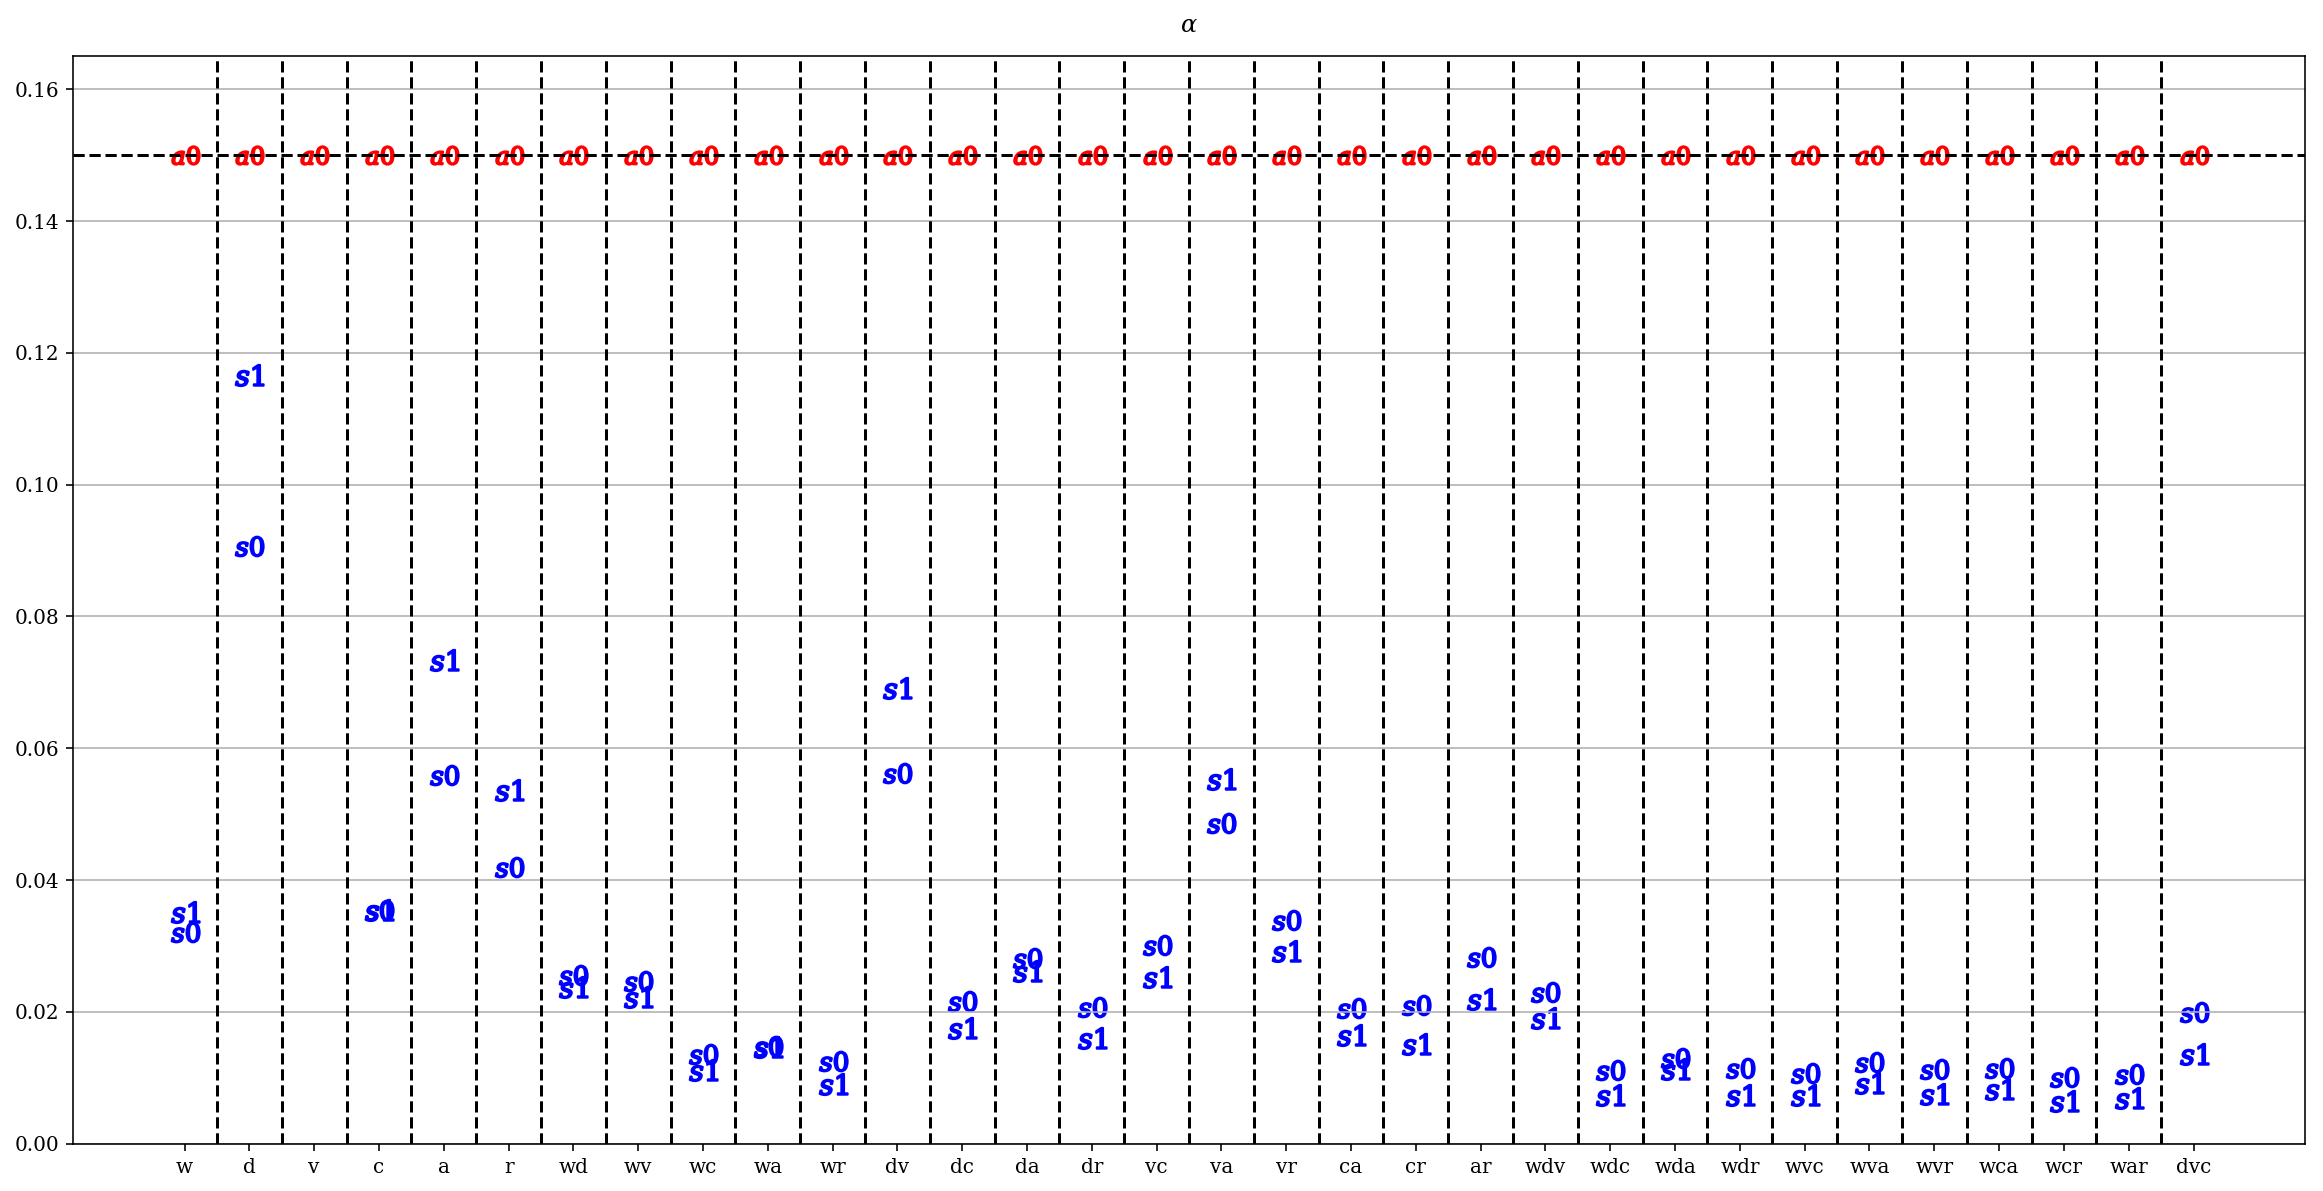

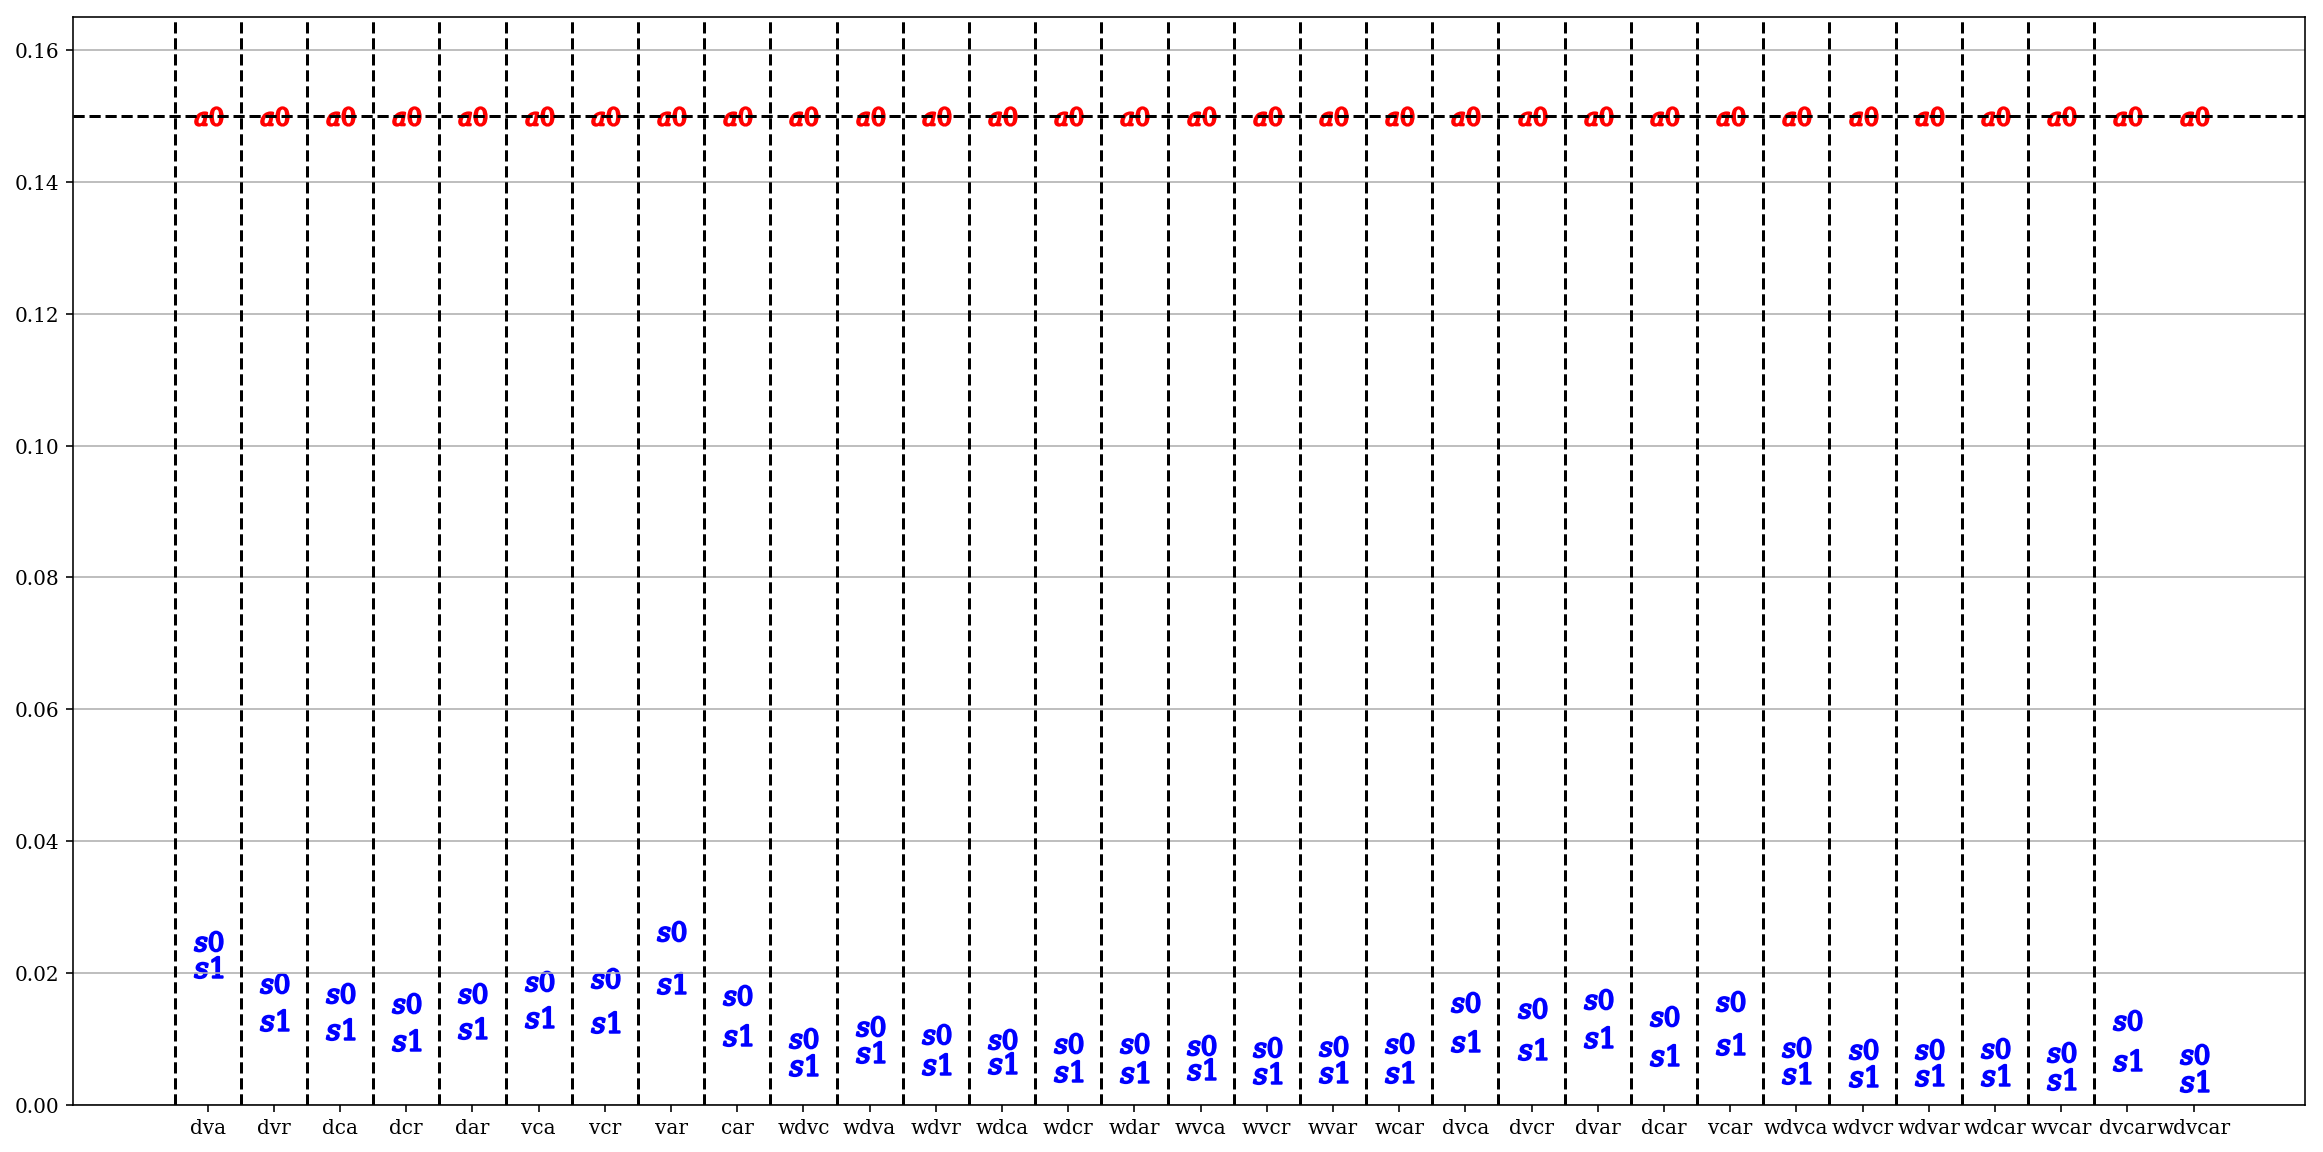

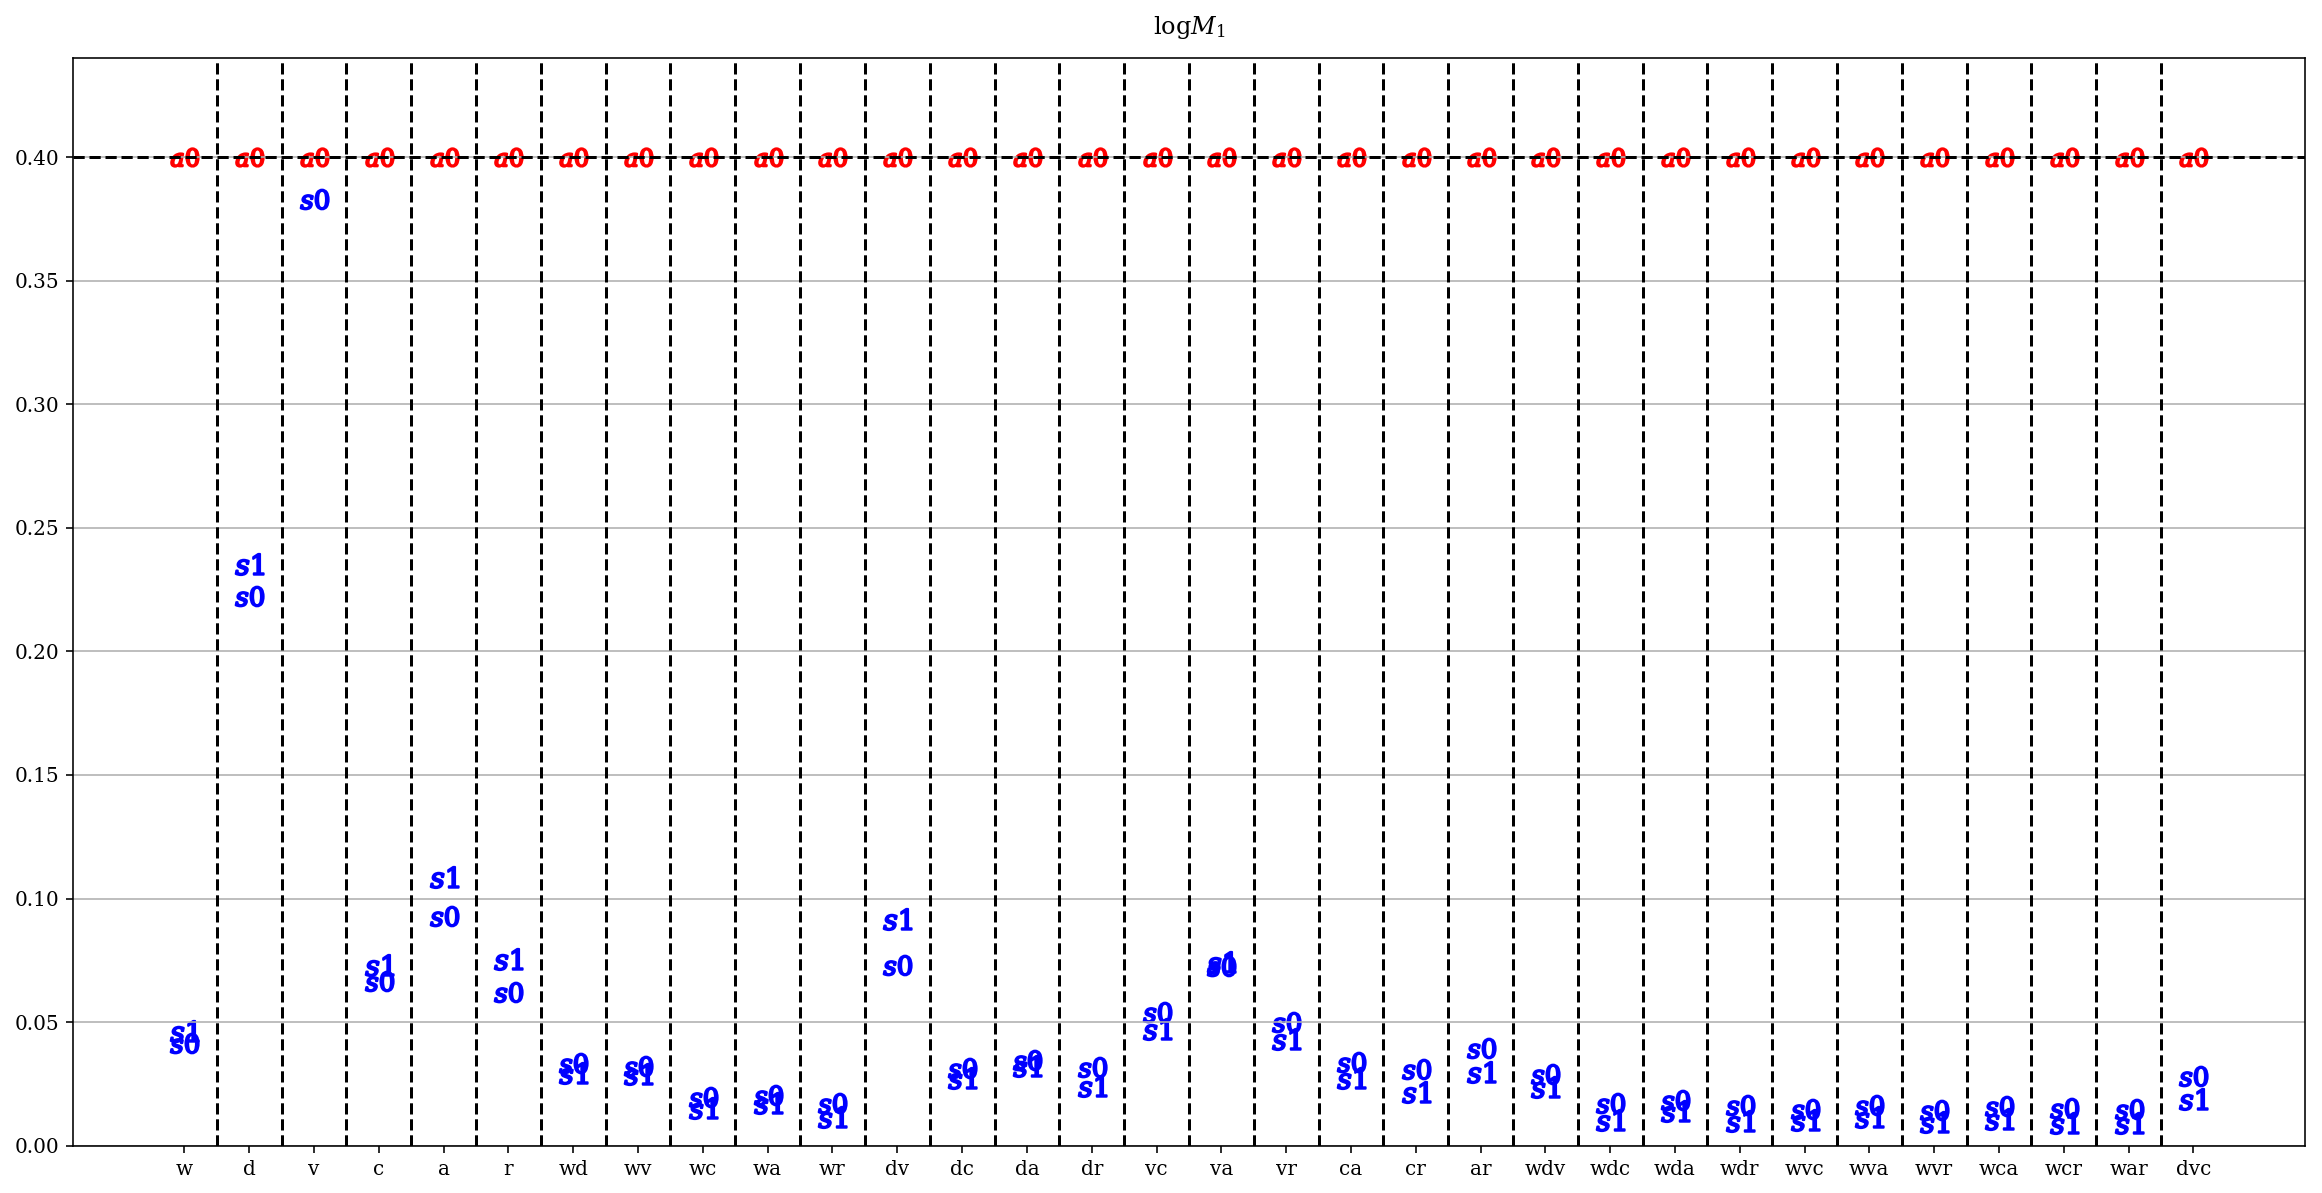

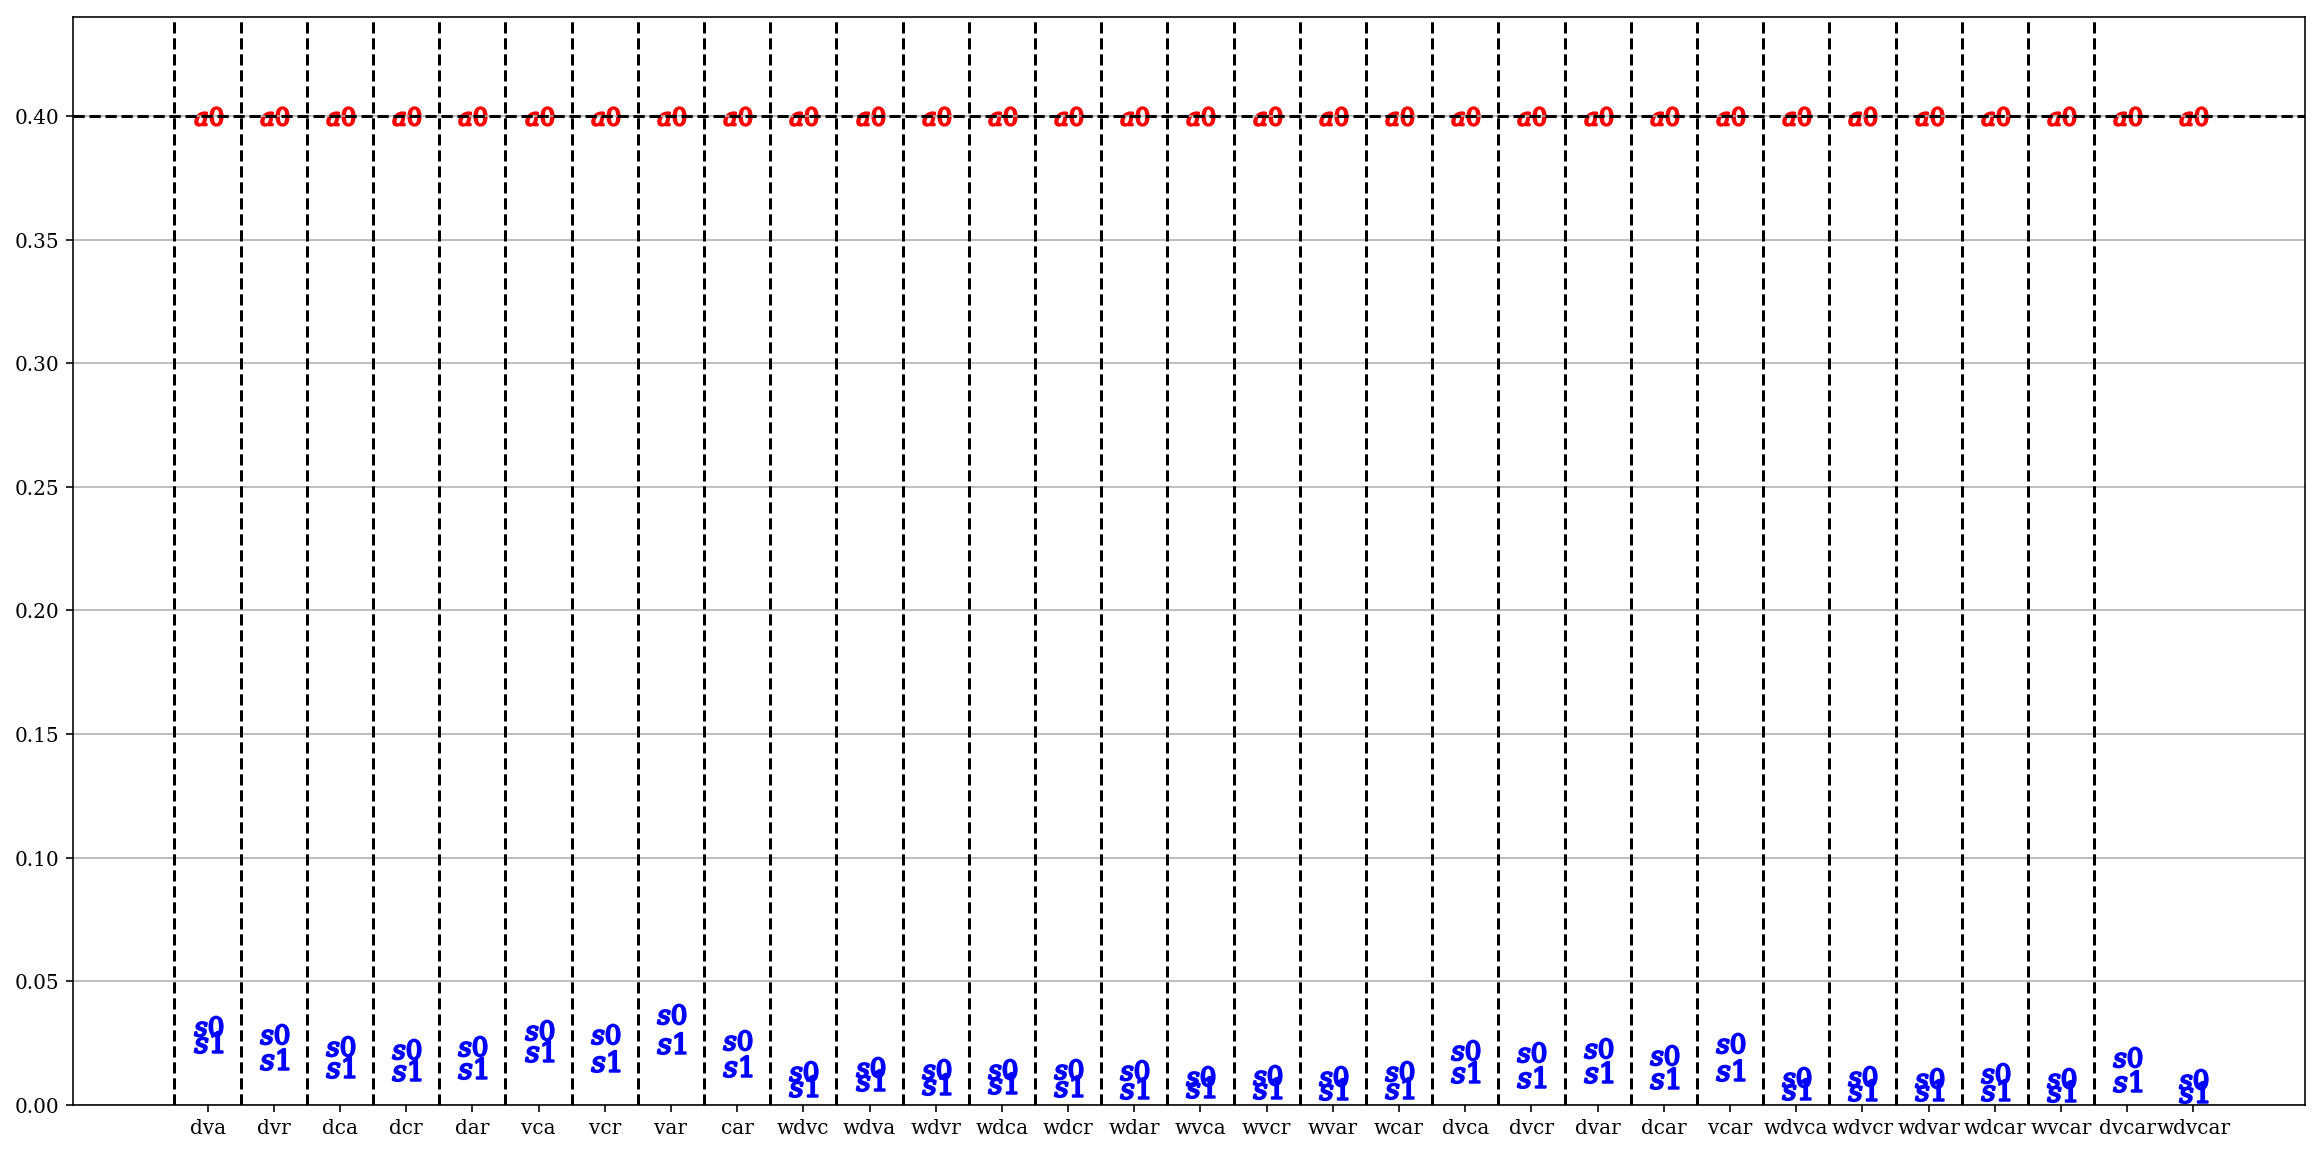

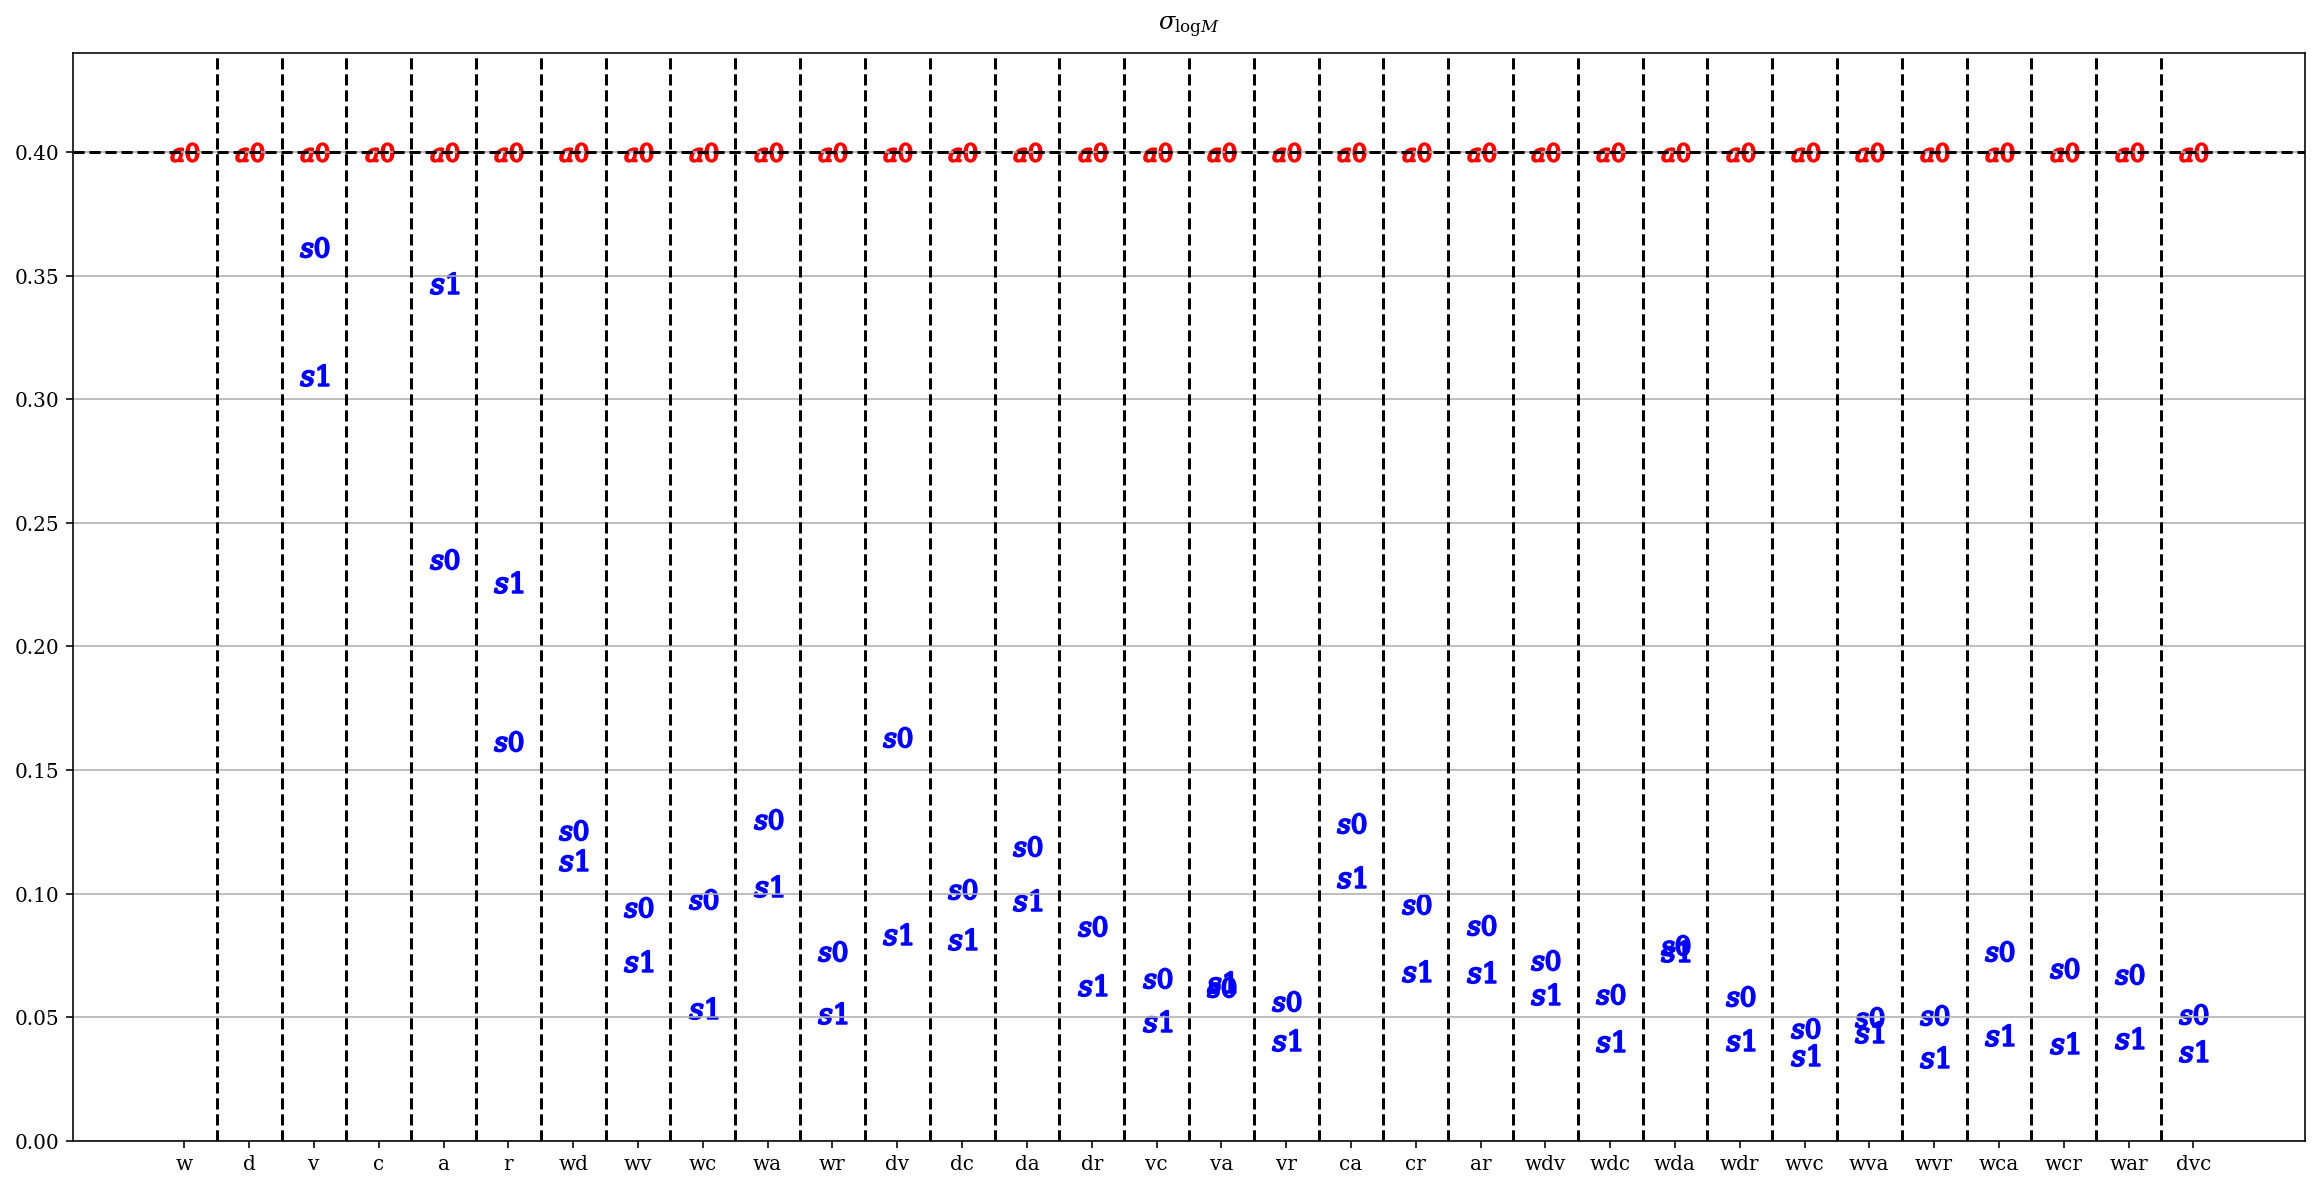

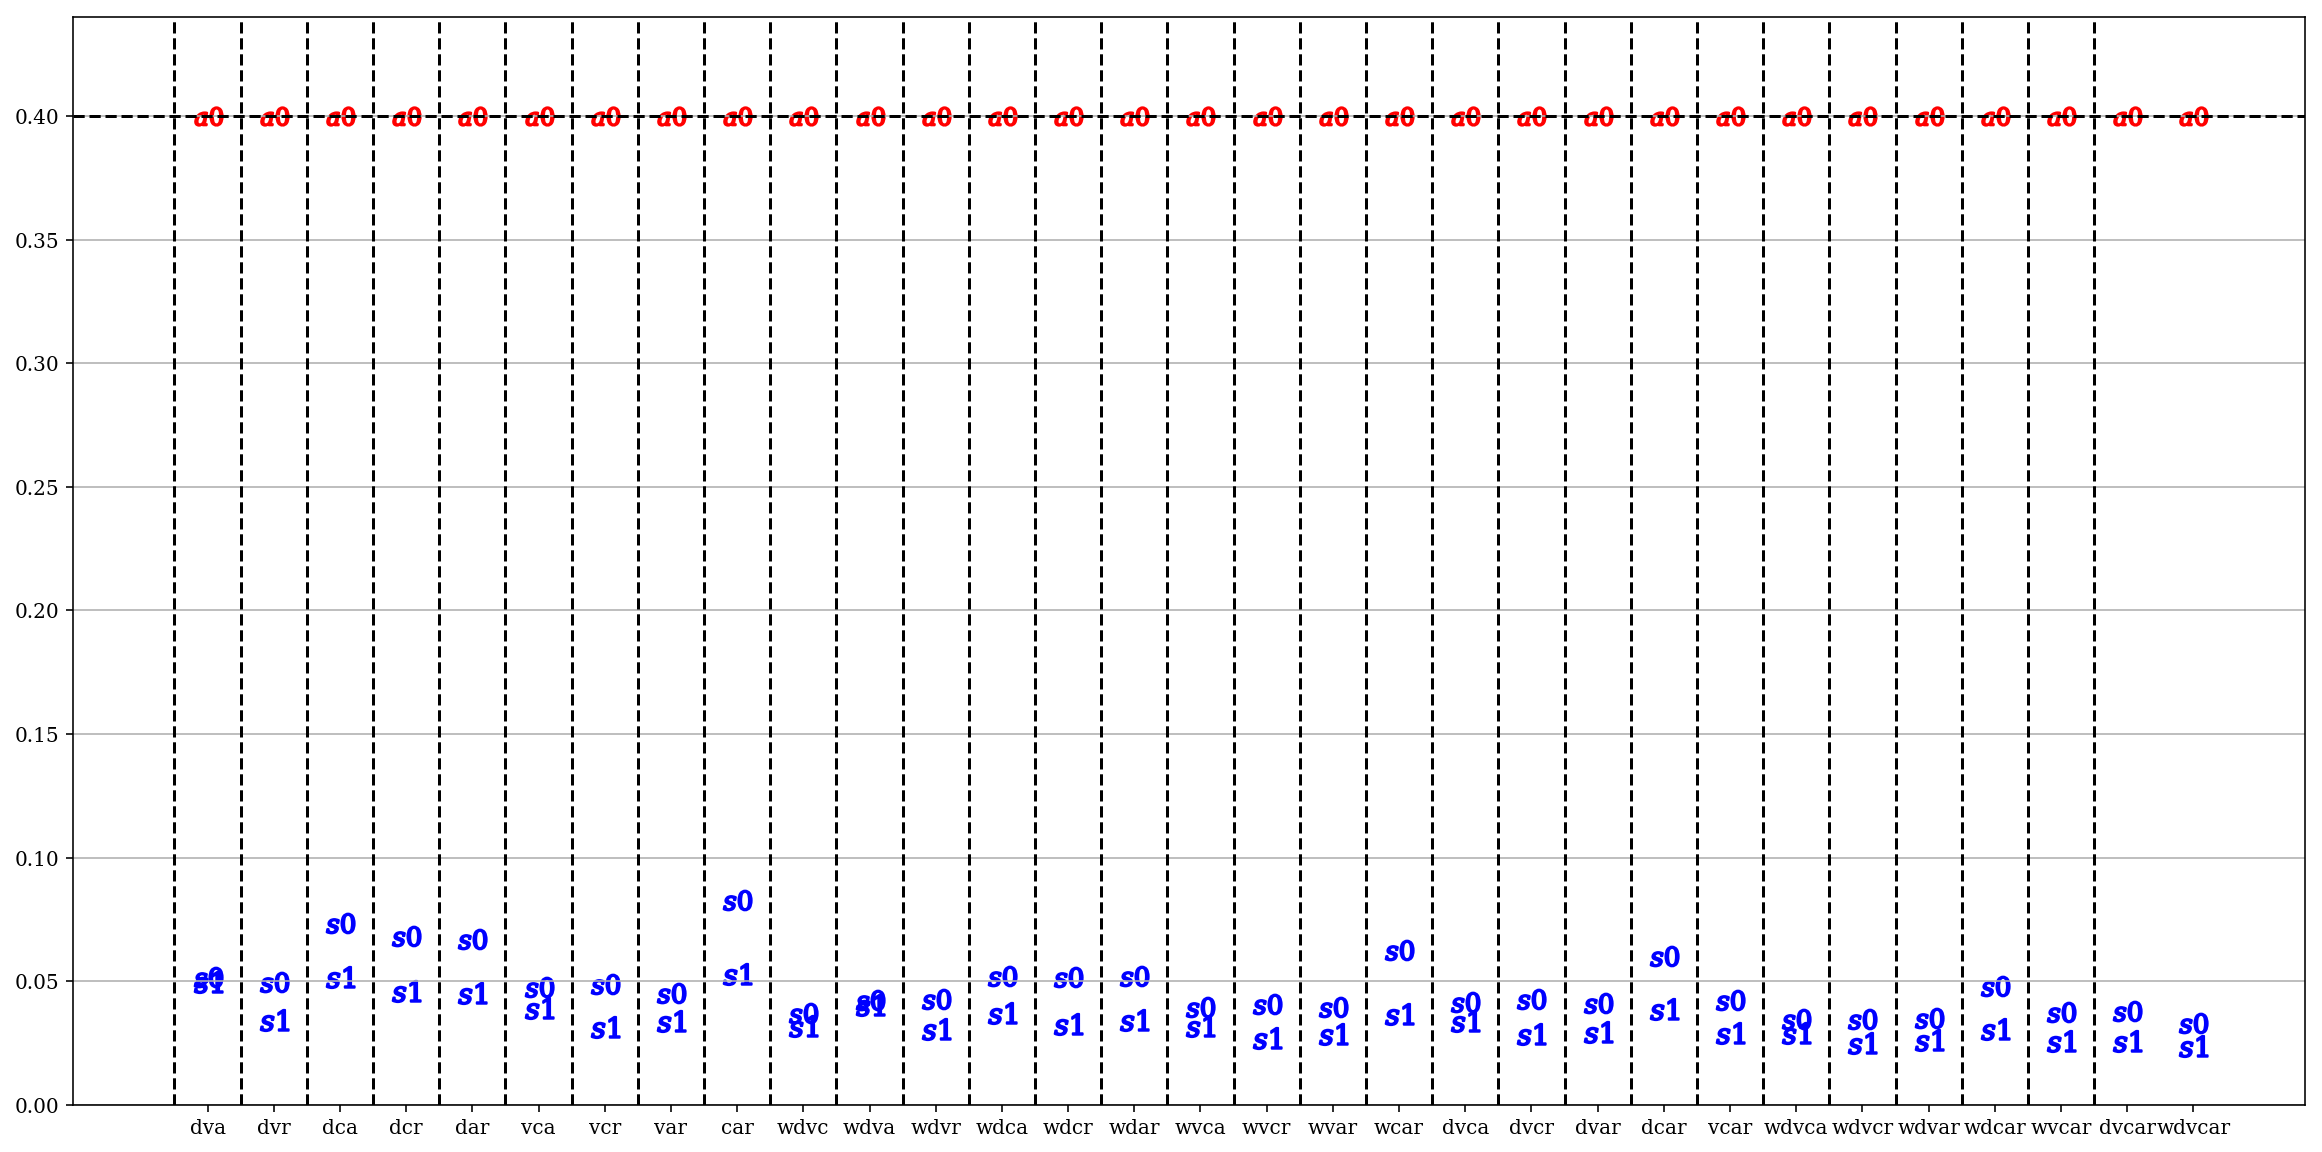

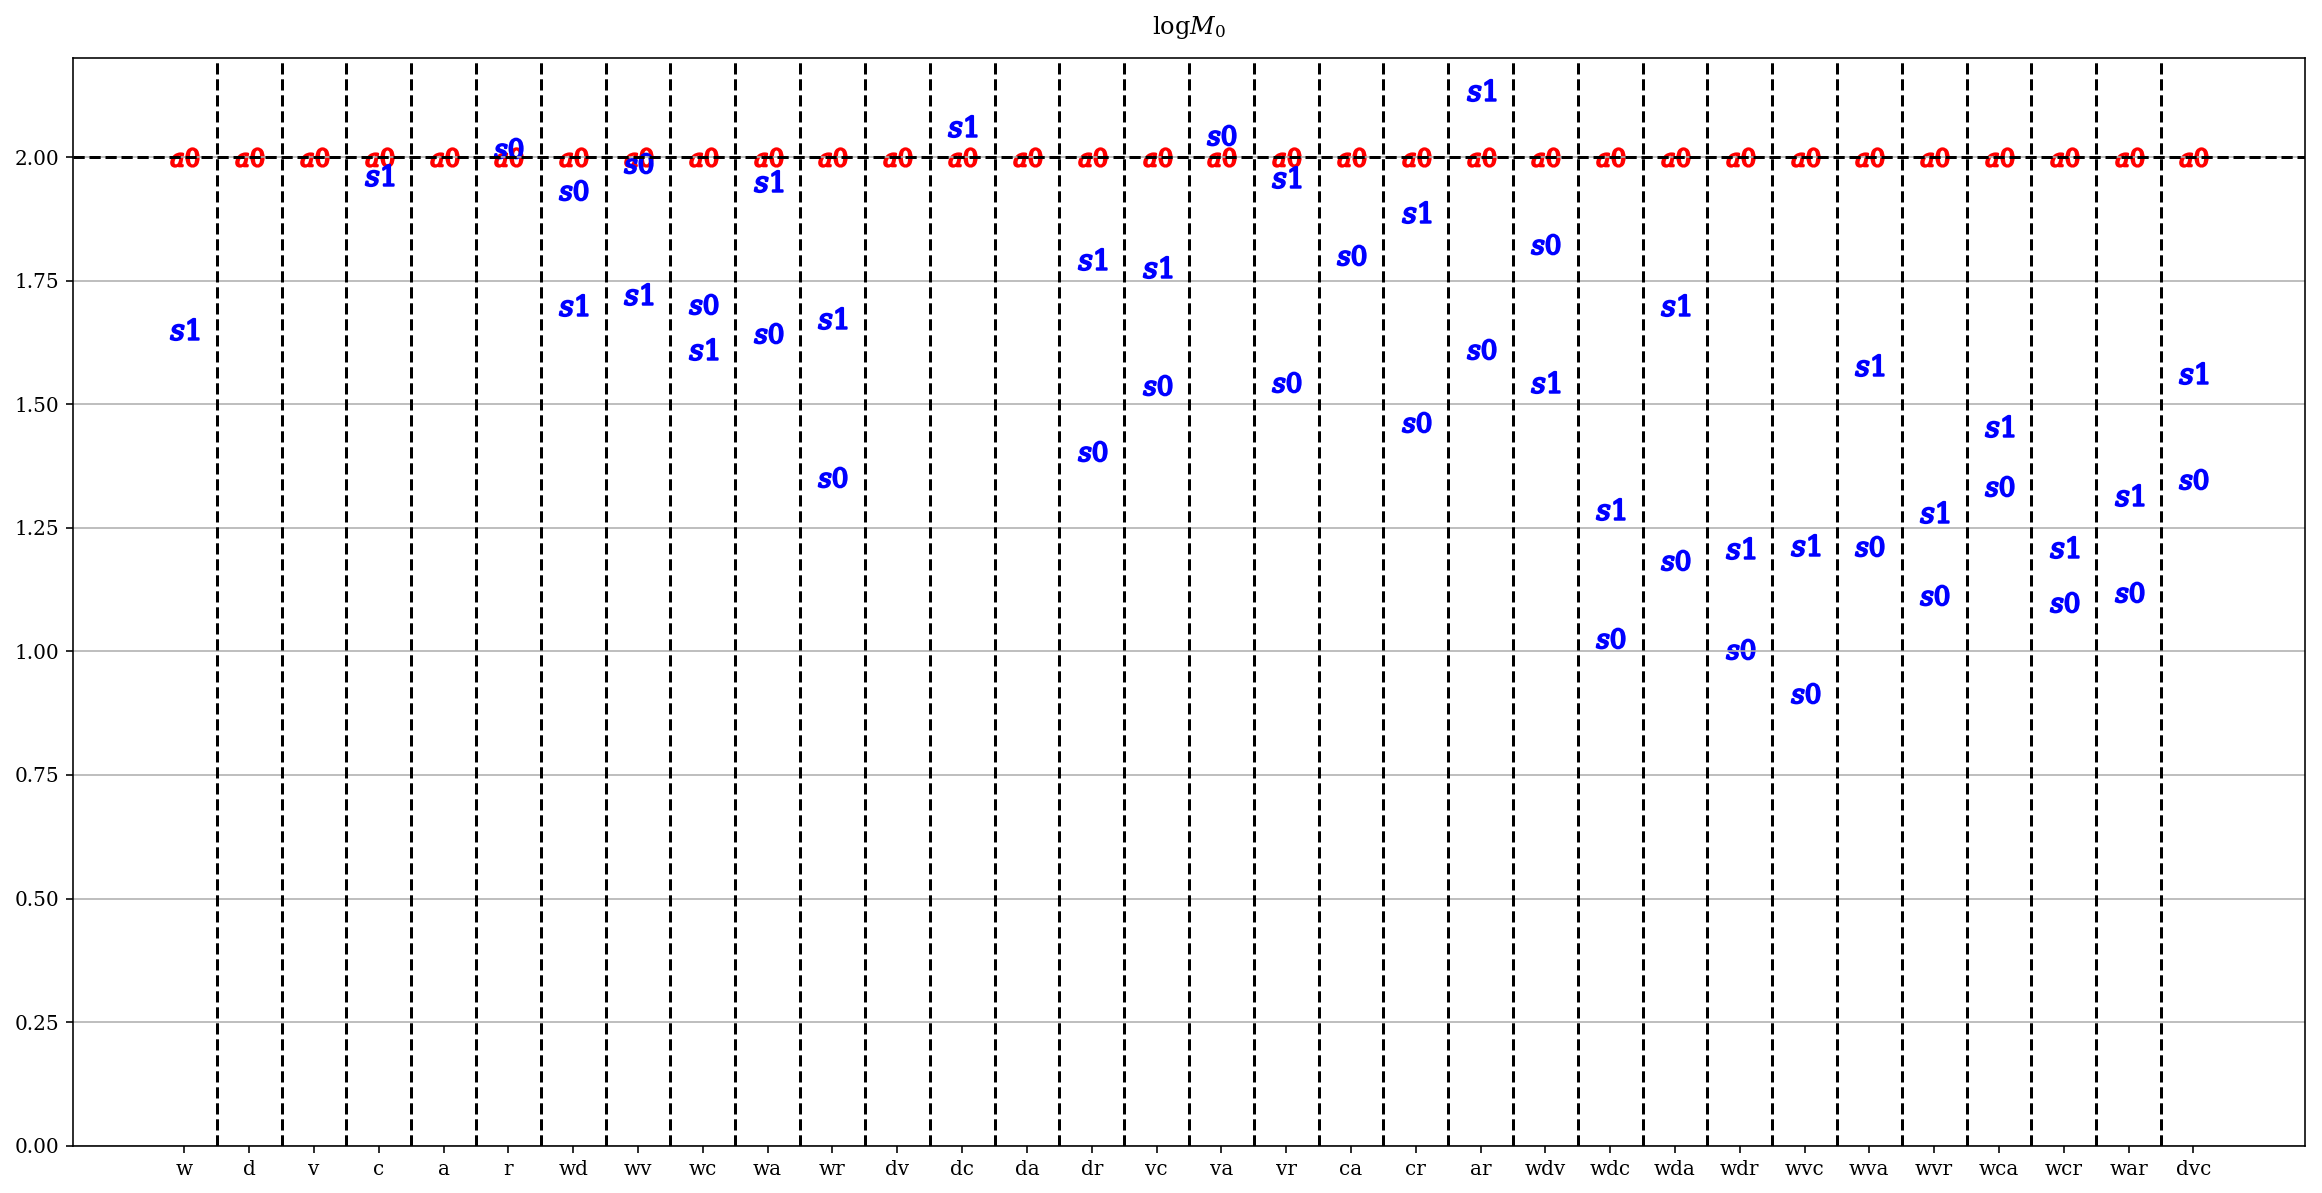

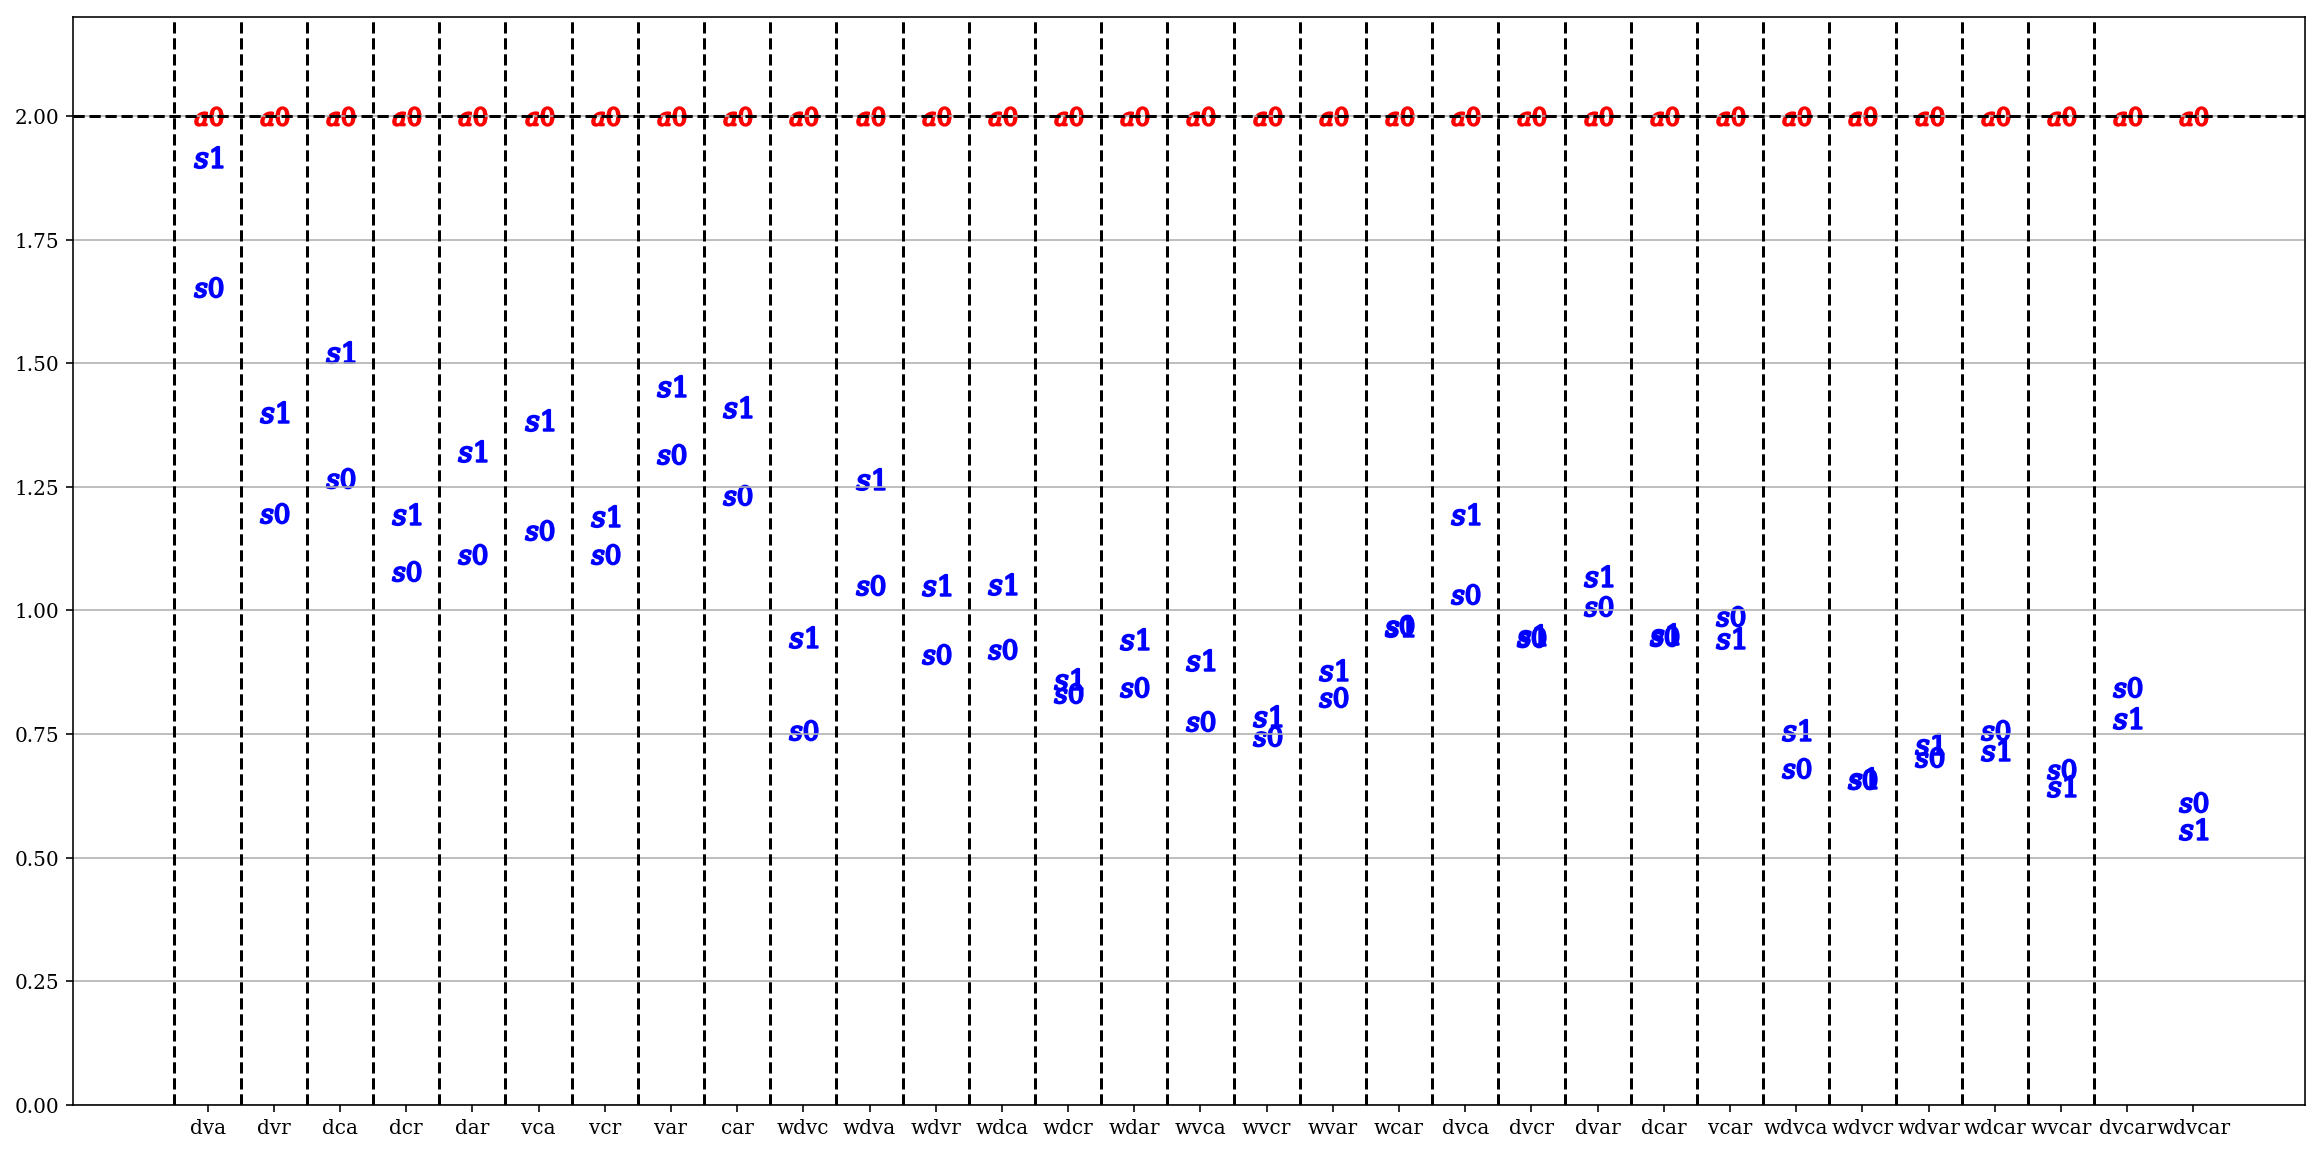

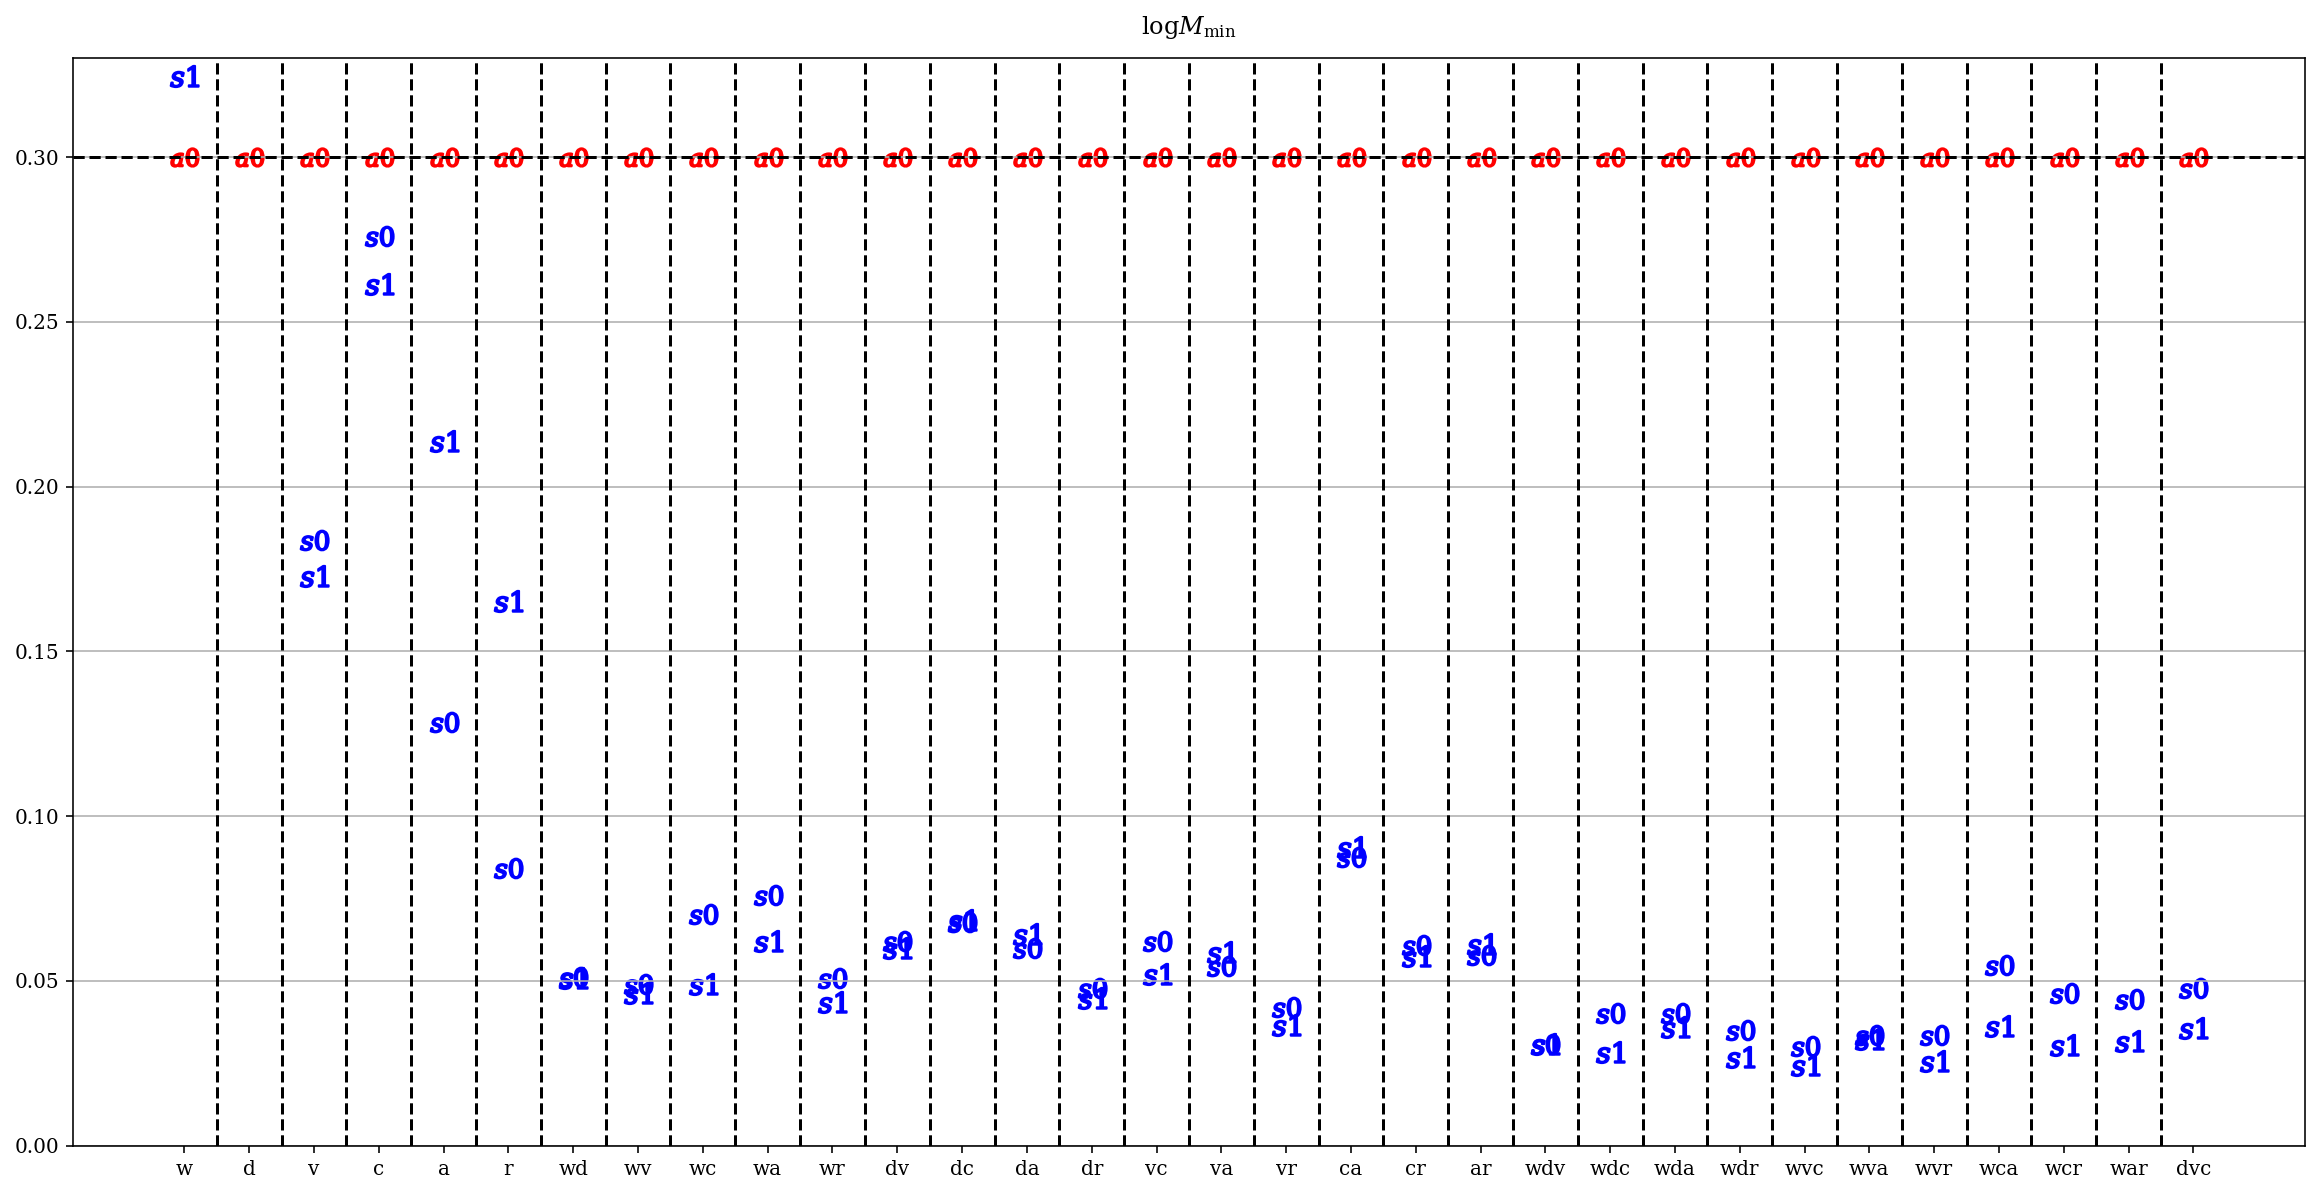

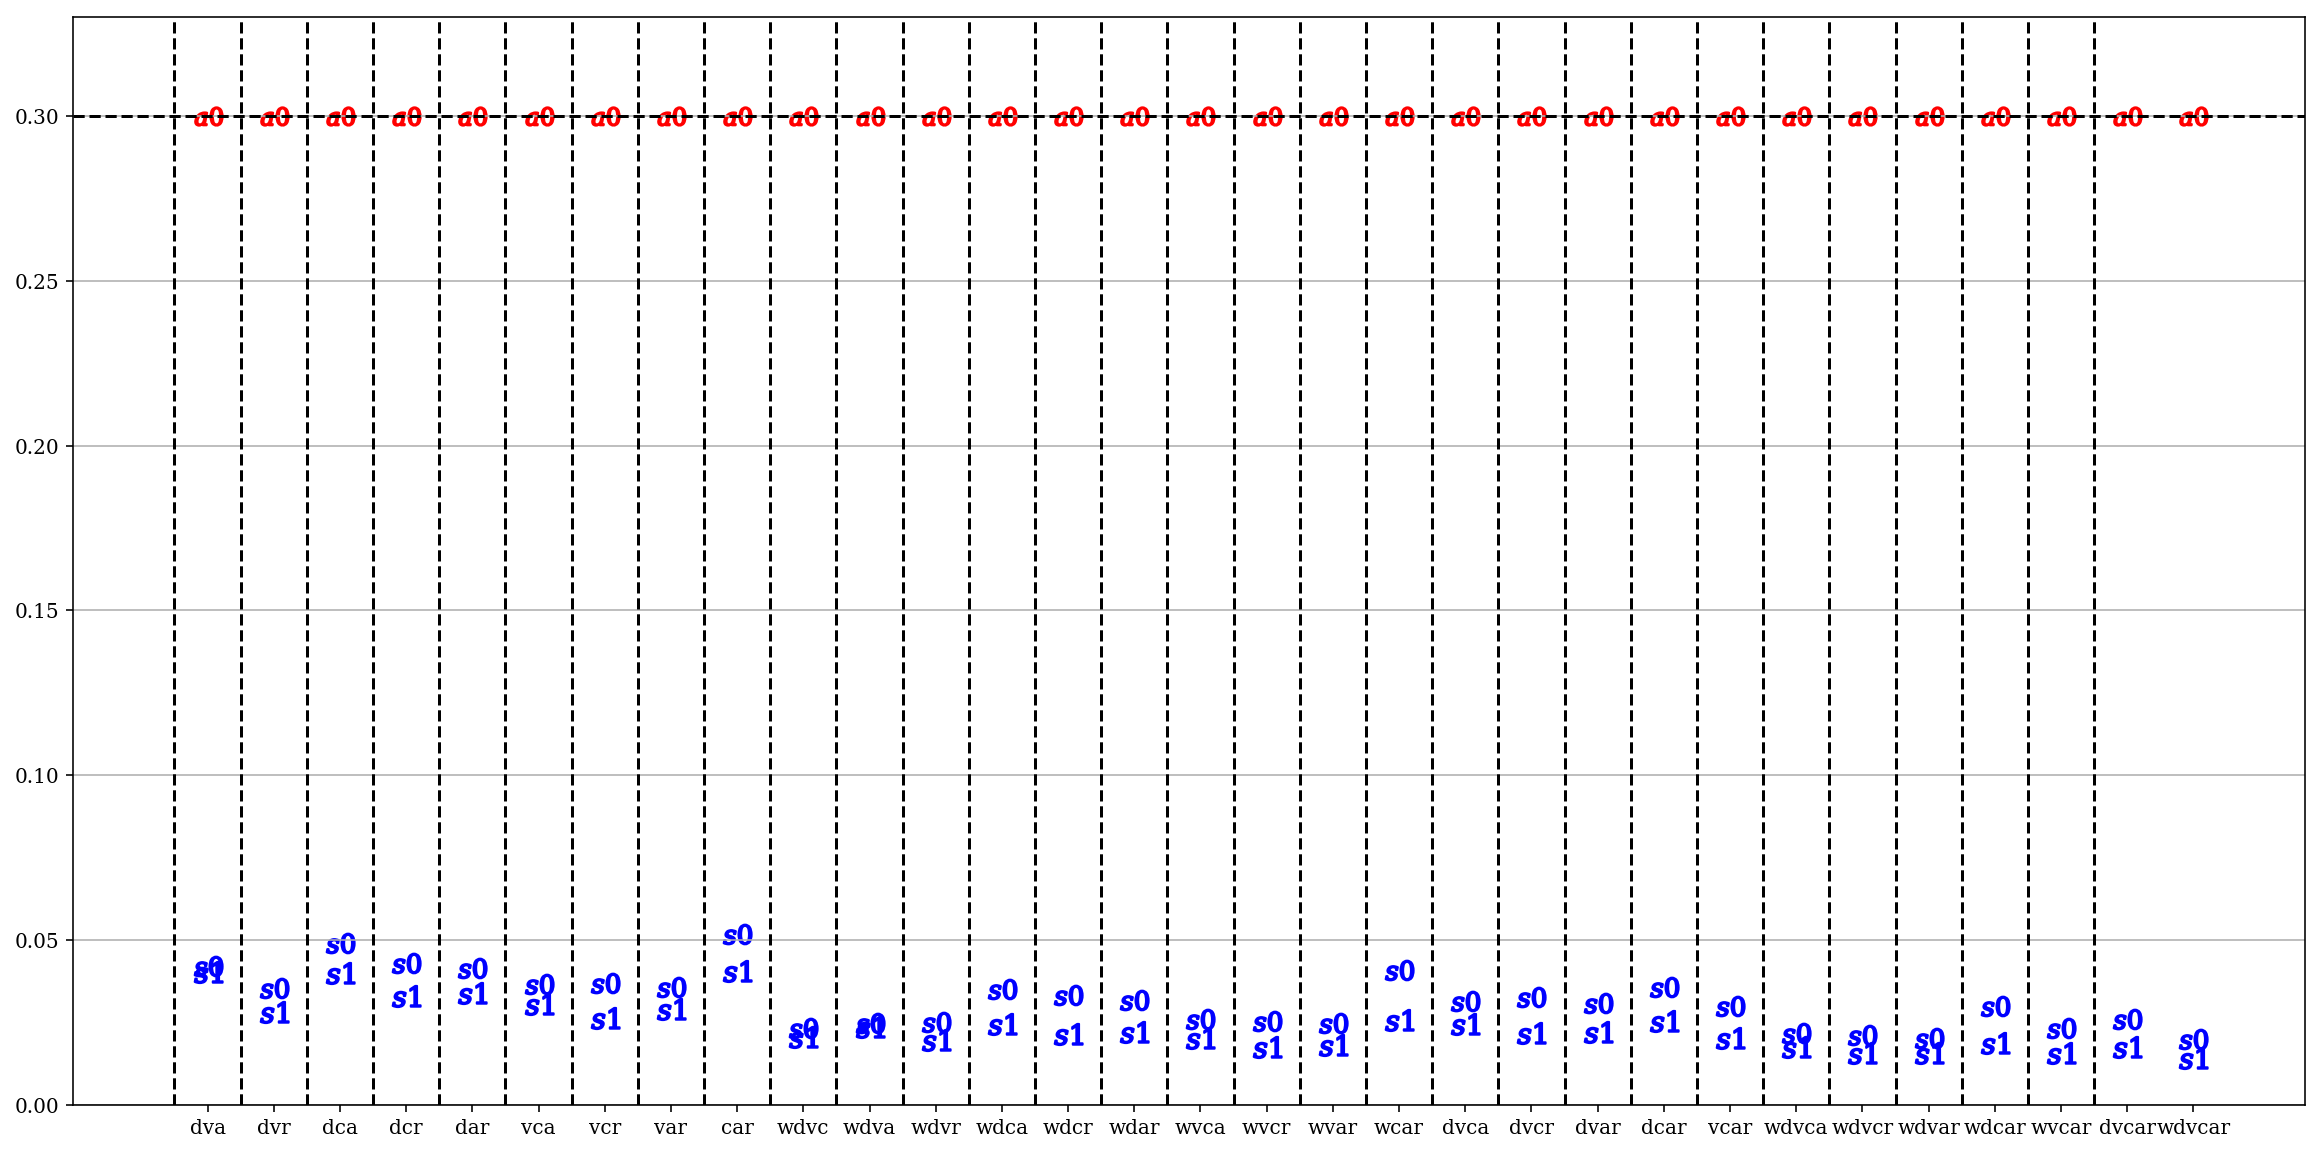

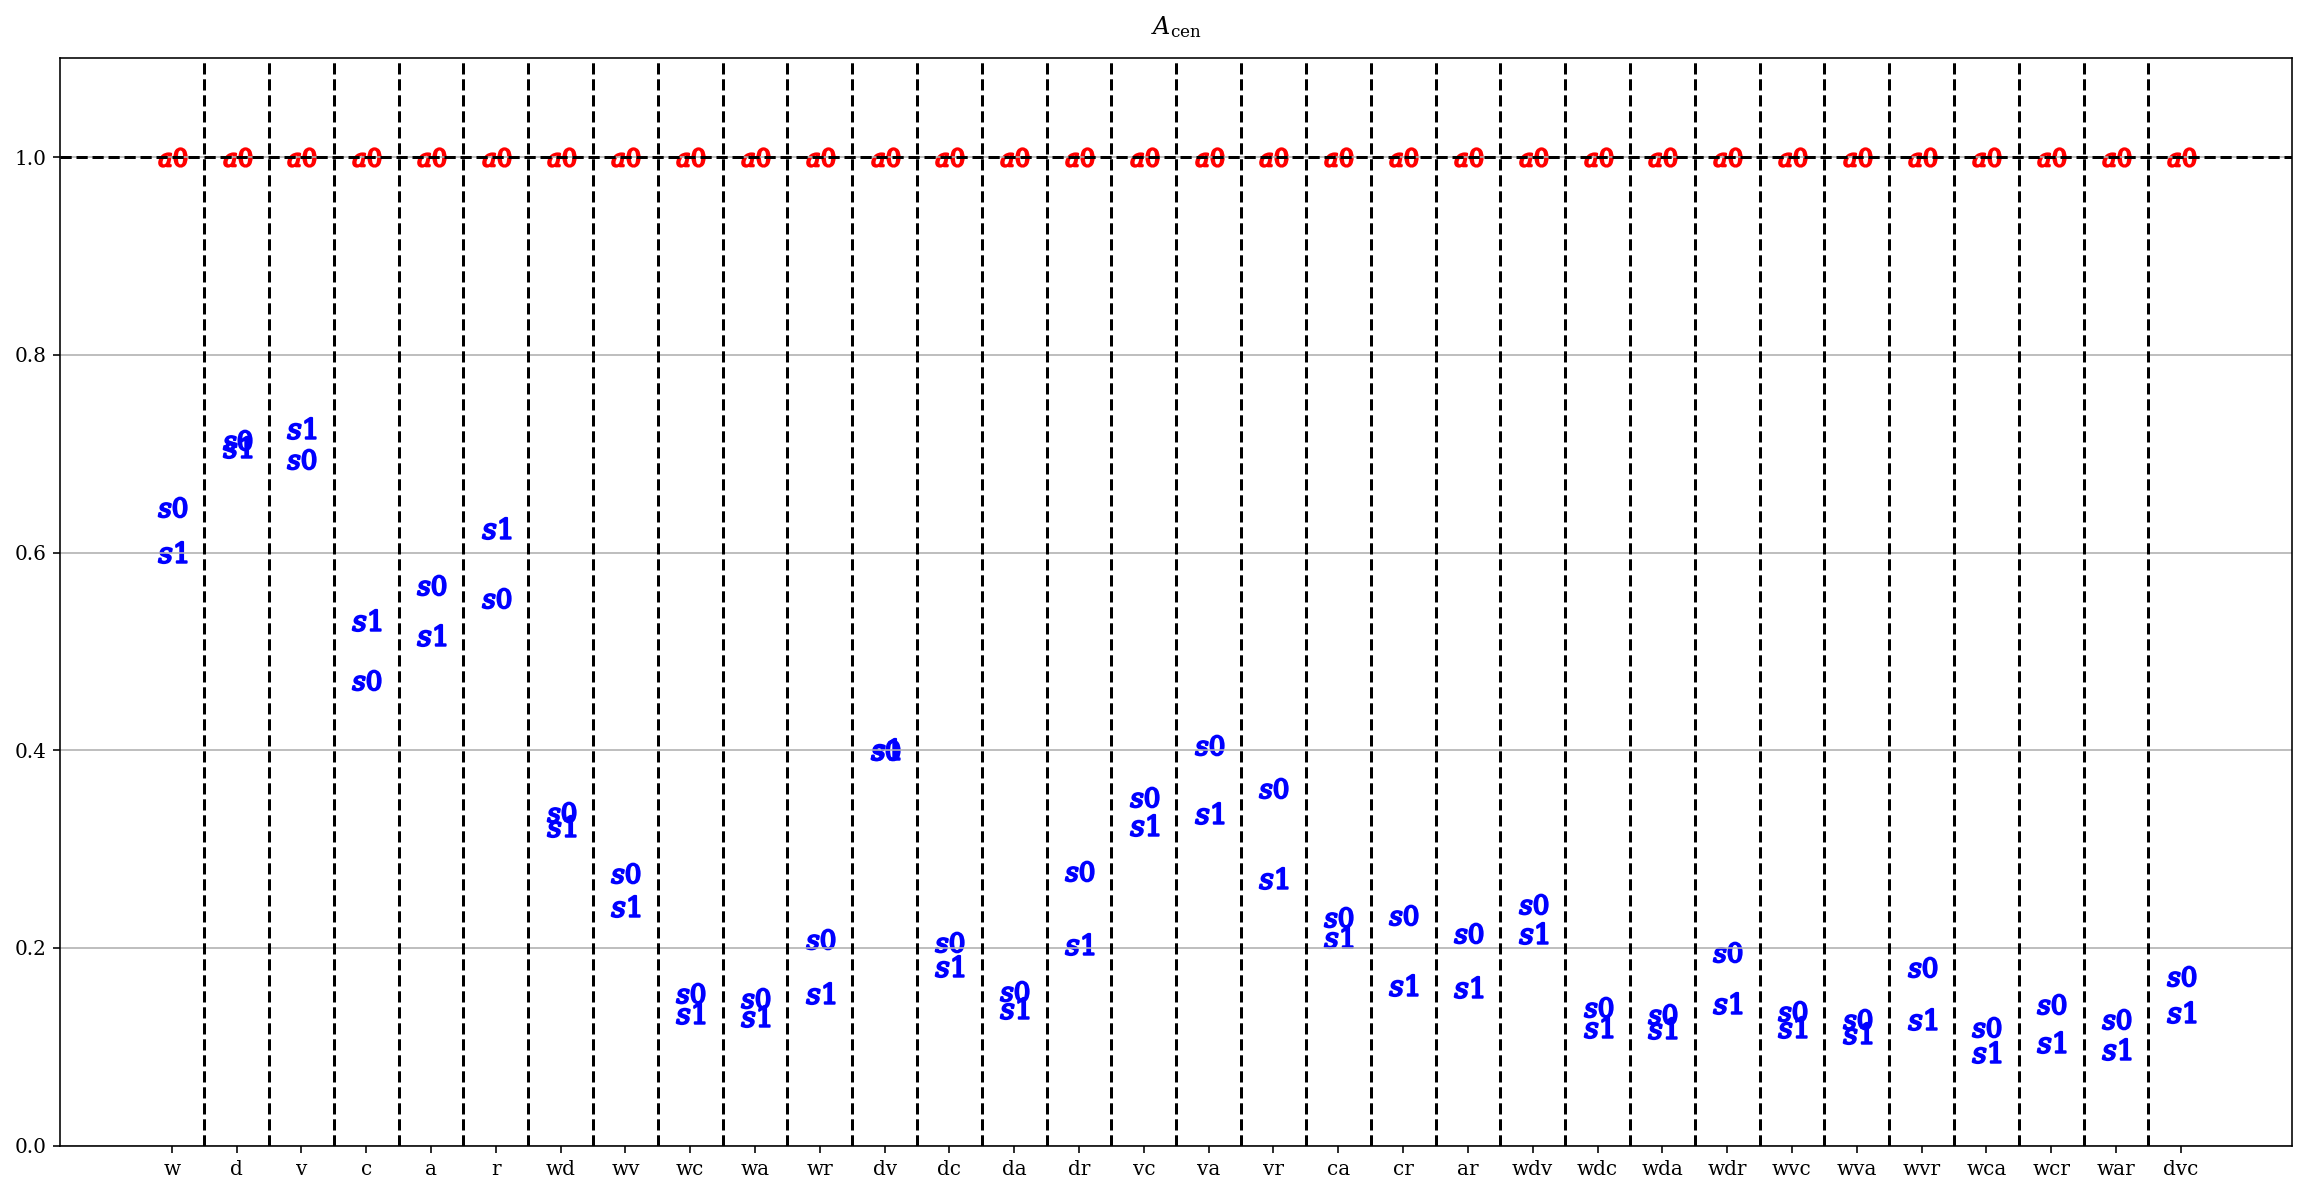

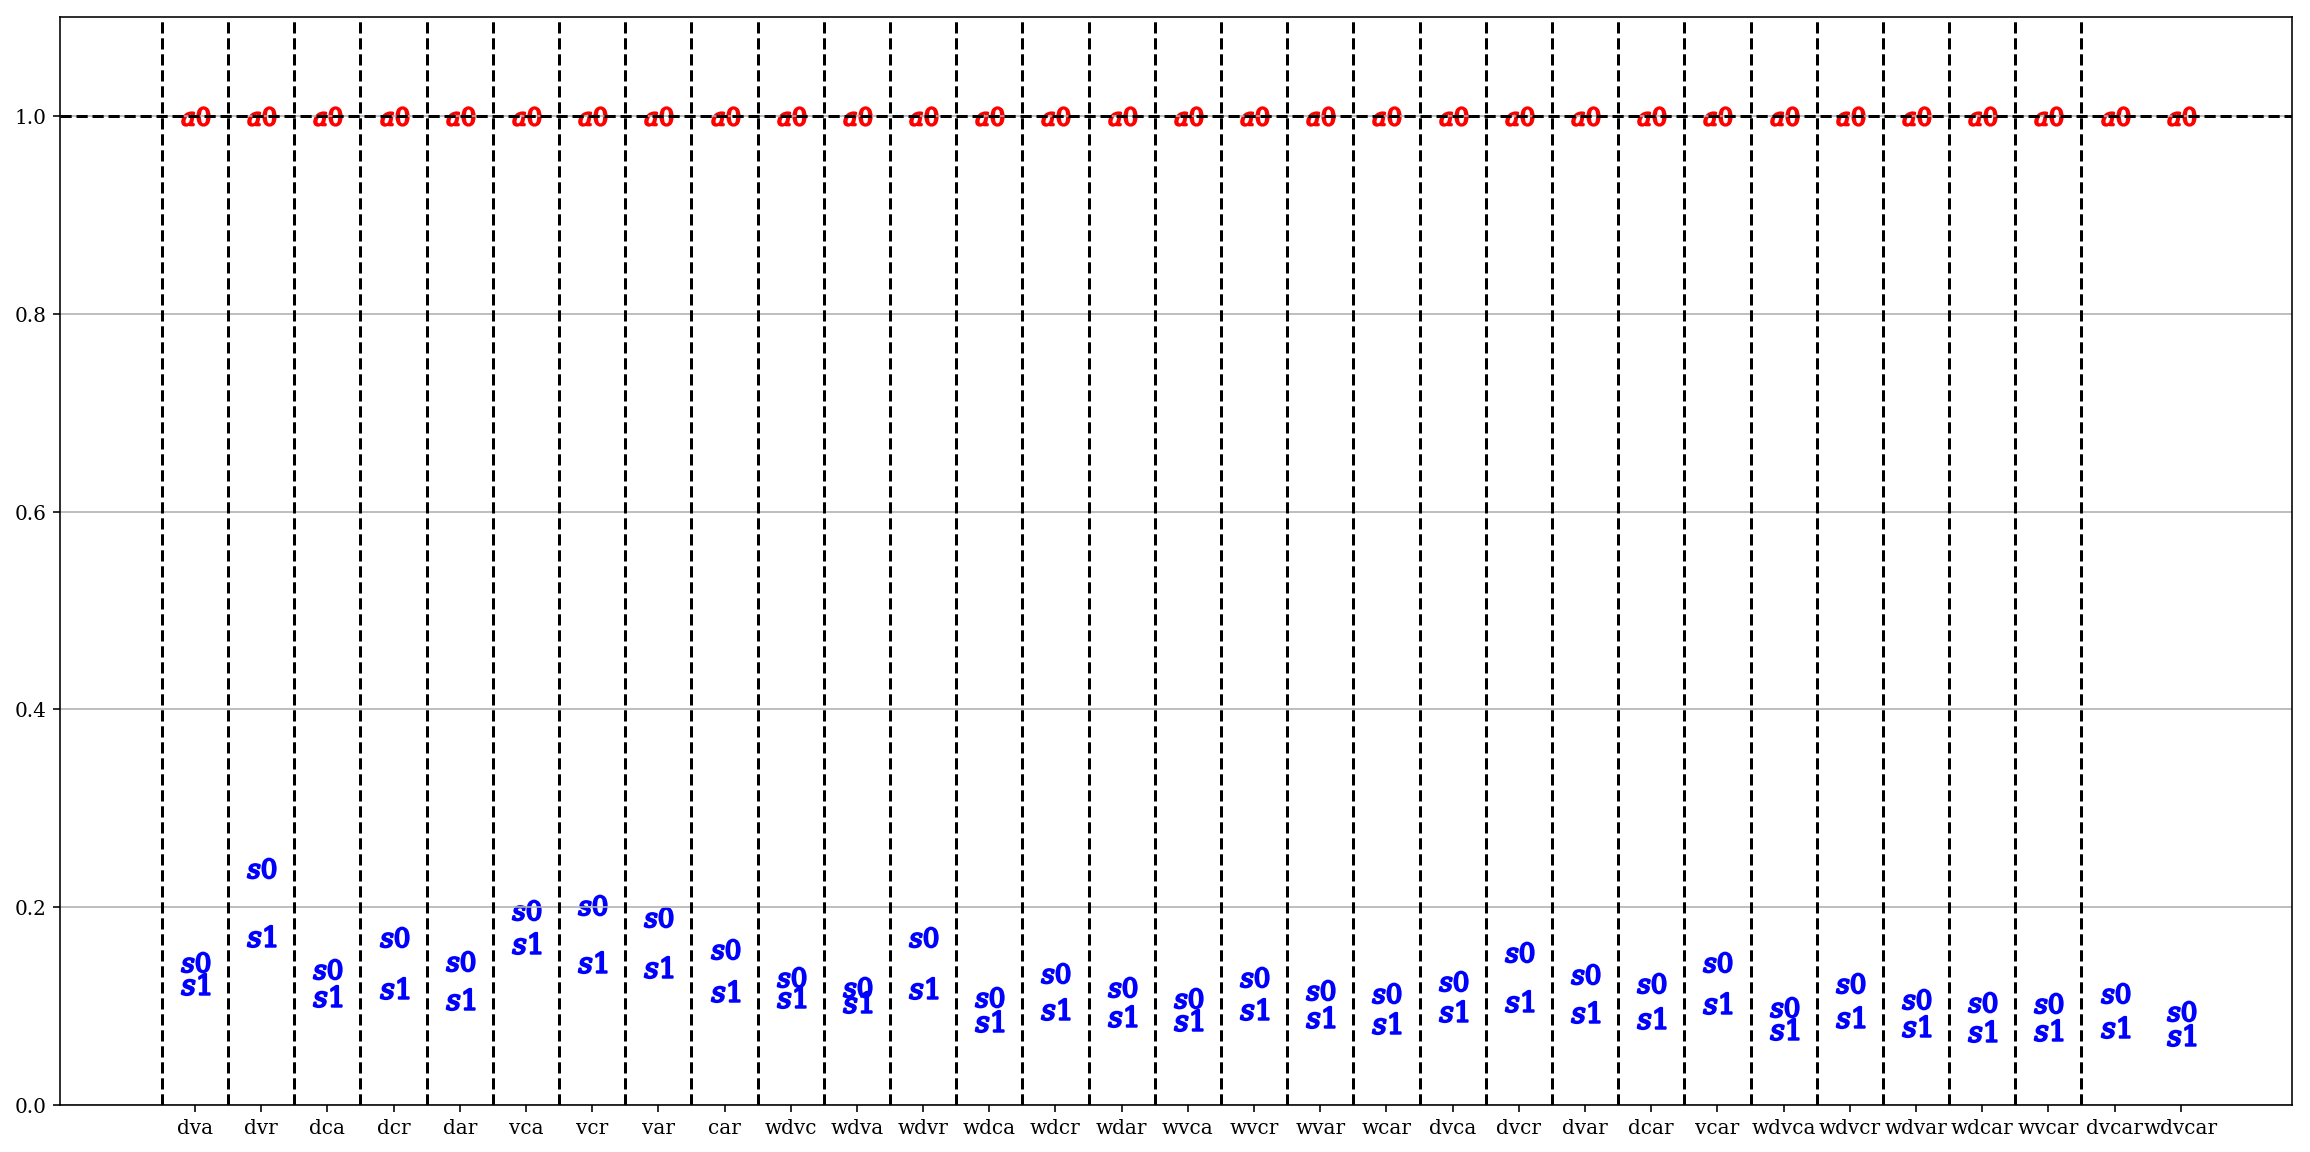

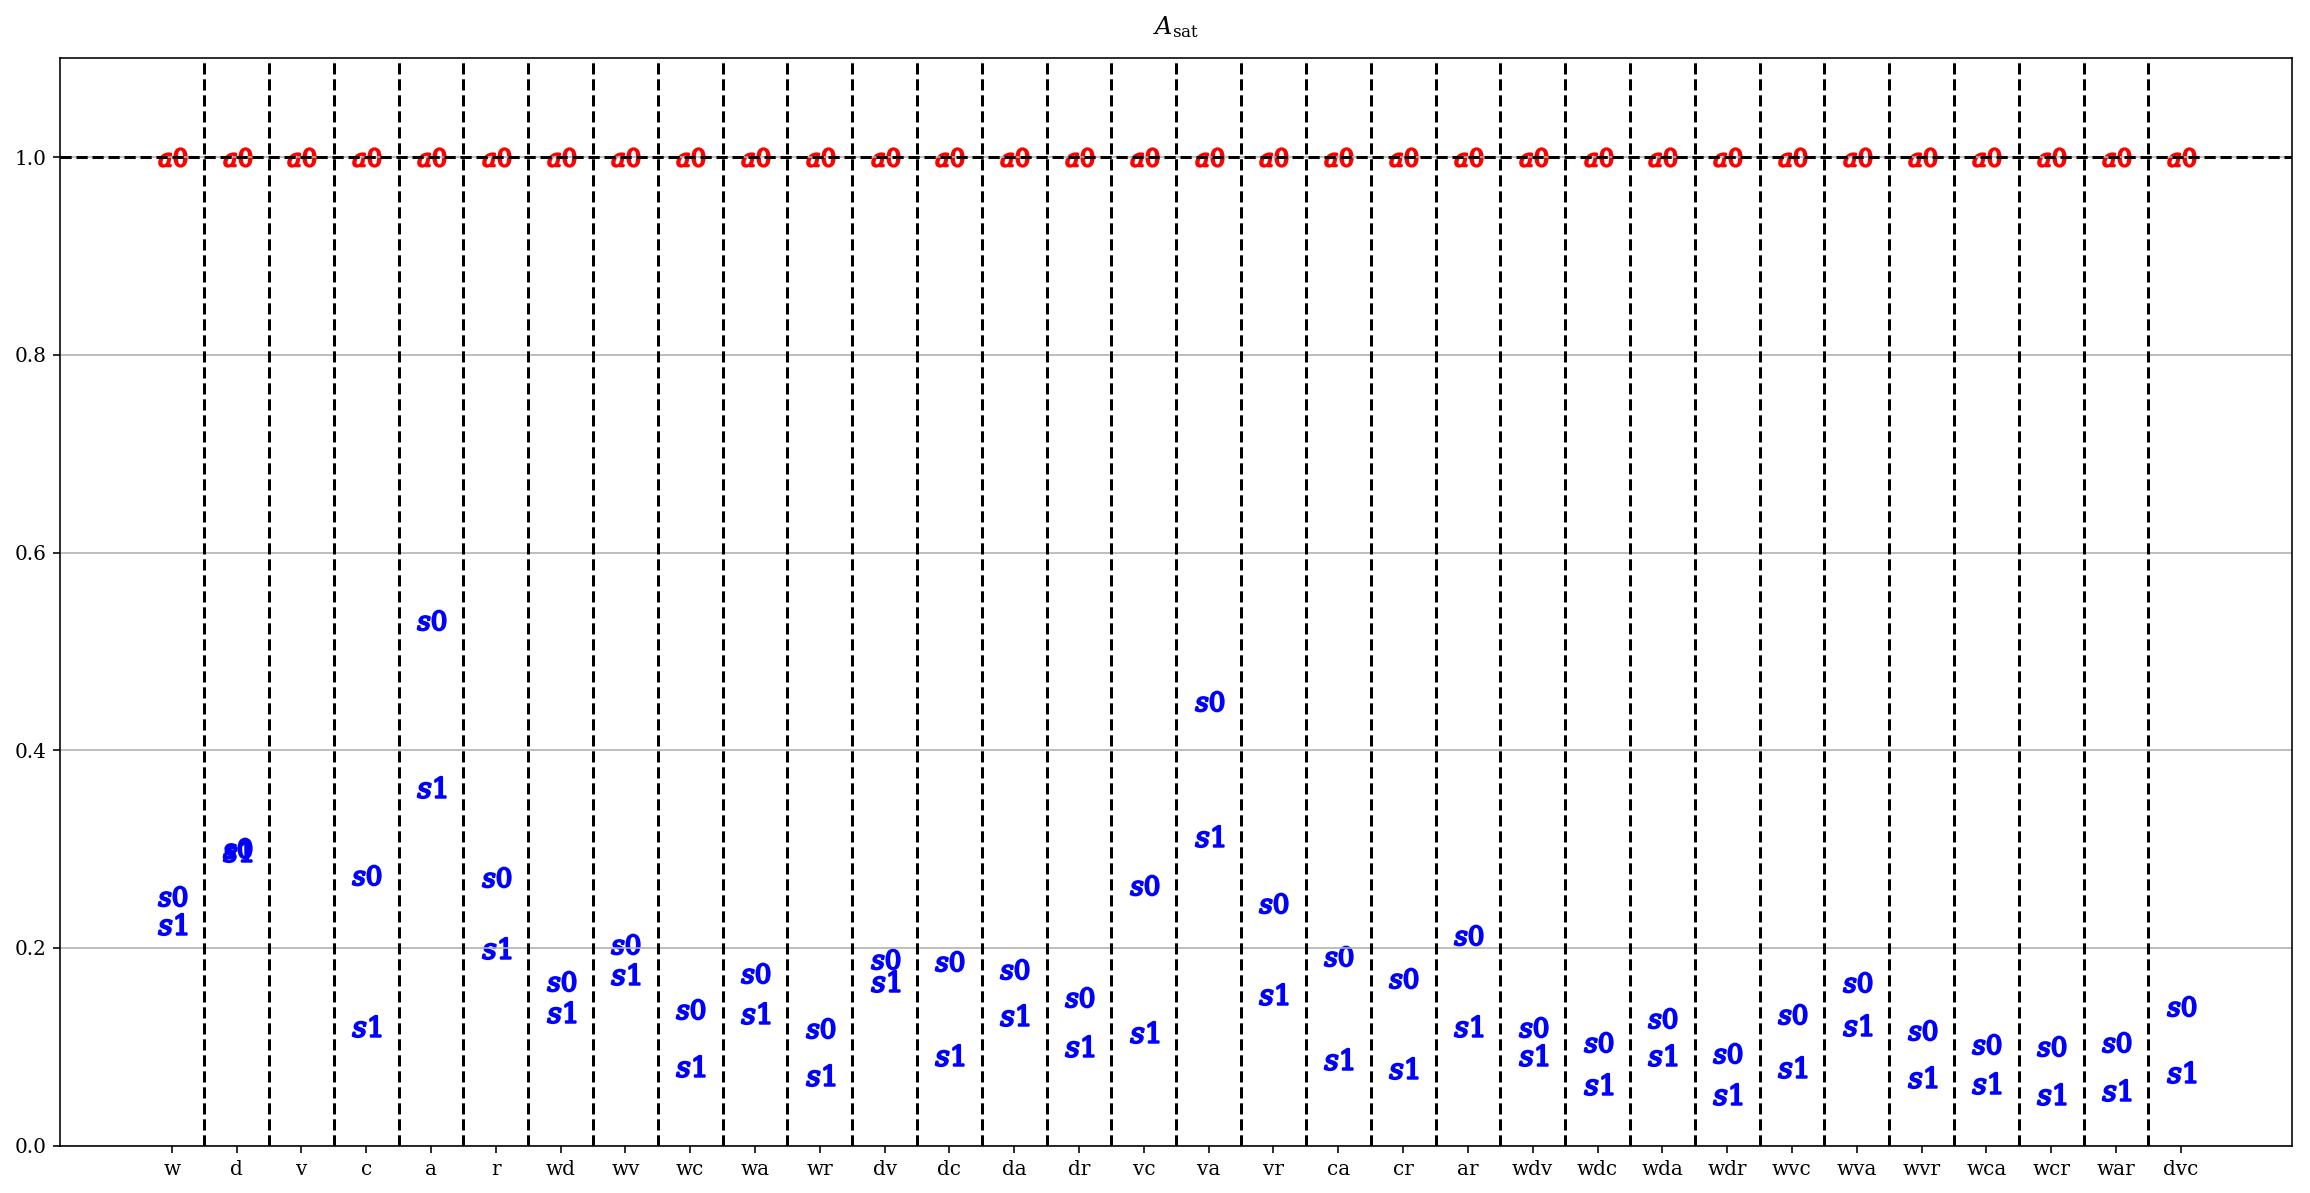

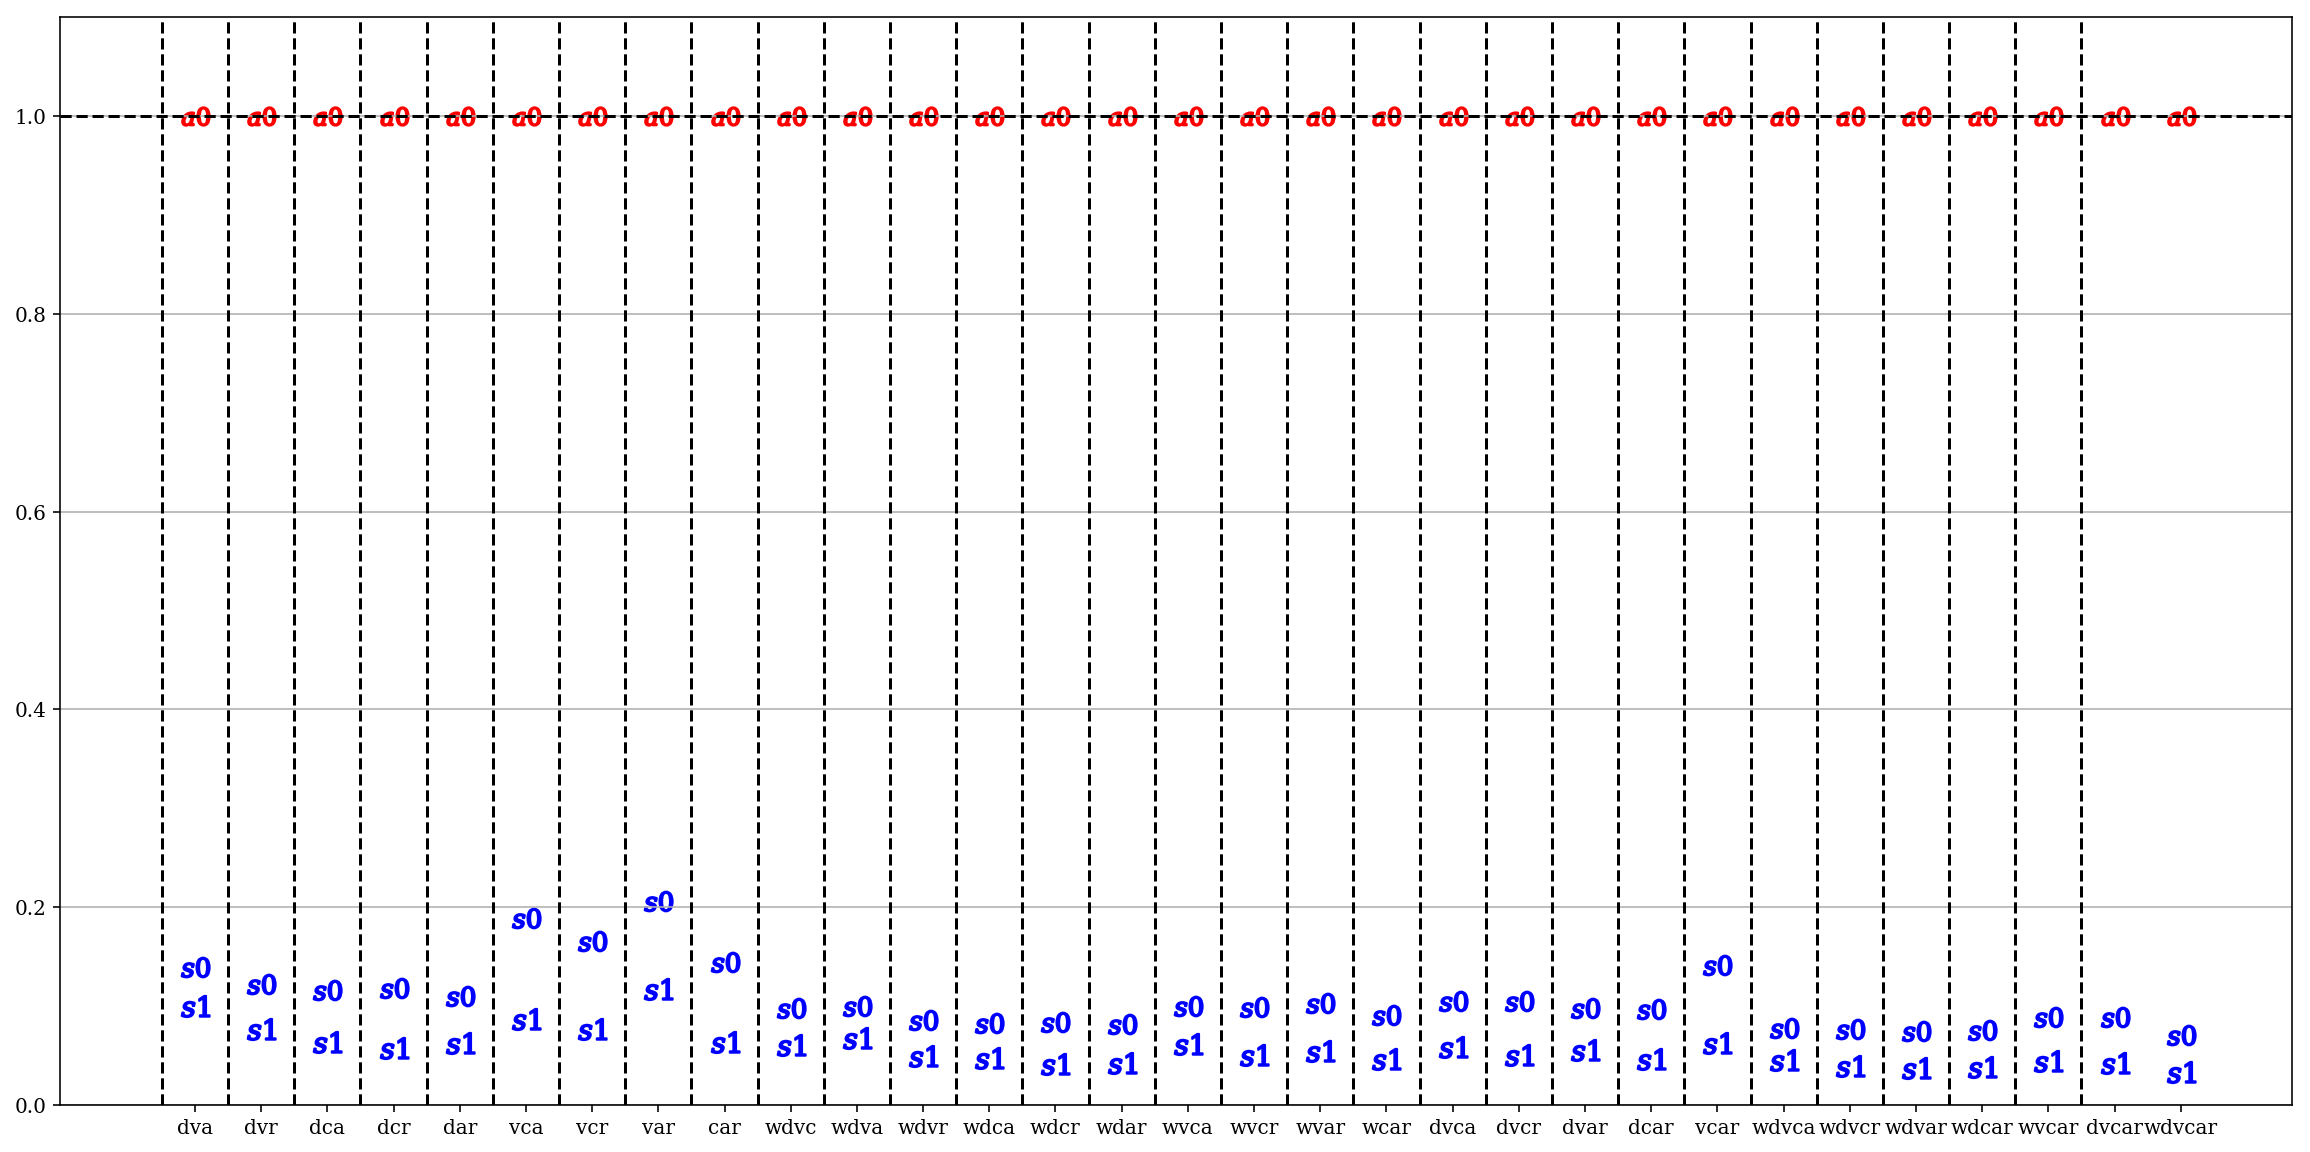

In [14]:
for i in range(7):
    sa0 = np.array([alphas_cut_0[key][i]*oneside[i] for key in keylist])
    s0 = np.array([sigma_cut_0[key][i] for key in keylist])
    sa1 = np.array([alphas_cut_1[key][i]*oneside[i] for key in keylist])
    s1 = np.array([sigma_cut_1[key][i] for key in keylist])
    #sa2 = np.array([alphas_cut_2[key][i]*oneside[i] for key in keylist])
    #s2 = np.array([sigma_cut_2[key][i] for key in keylist])
    #sa3 = np.array([alphas_cut_3[key][i]*oneside[i] for key in keylist])
    #s3 = np.array([sigma_cut_3[key][i] for key in keylist])
    #sa4 = np.array([alphas_cut_4[key][i]*oneside[i] for key in keylist])
    #s4 = np.array([sigma_cut_4[key][i] for key in keylist])
    plt.figure(figsize=(20,10))
    plt.axhline(oneside[i],c='k',ls='--')
    for j in range(31):
        plt.axvline(j+0.5,c='k',ls='--')
    plt.scatter(range(32),sa0[:32],c='r',marker='$a0$',s=200)
    #plt.scatter(range(32),sa1[:32],c='r',marker='$a1$',s=200)
    #plt.scatter(range(32),sa2[:32],c='r',marker='$a2$',s=200)
    #plt.scatter(range(32),sa3[:32],c='r',marker='$a3$',s=200)
    #plt.scatter(range(32),sa4[:32],c='r',marker='$a4$',s=200)
    plt.scatter(range(32),s0[:32],c='b',marker='$s0$',s=200)
    plt.scatter(range(32),s1[:32],c='b',marker='$s1$',s=200)
    #plt.scatter(range(32),s2[:32],c='b',marker='$s2$',s=200)
    #plt.scatter(range(32),s3[:32],c='b',marker='$s3$',s=200)
    #plt.scatter(range(32),s4[:32],c='b',marker='$s4$',s=200)
    plt.xticks(range(32),keylist[:32])
    plt.ylim((0,1.1*oneside[i]))
    plt.grid(axis='y')
    plt.title(pf.param_list[i])
    
    plt.figure(figsize=(20,10))
    plt.axhline(oneside[i],c='k',ls='--')
    for j in range(31,61):
        plt.axvline(j+0.5,c='k',ls='--')
    plt.scatter(range(32,63),sa0[32:],c='r',marker='$a0$',s=200)
    #plt.scatter(range(32,63),sa1[32:],c='r',marker='$a1$',s=200)
    #plt.scatter(range(32,63),sa2[32:],c='r',marker='$a2$',s=200)
    #plt.scatter(range(32,63),sa3[32:],c='r',marker='$a3$',s=200)
    #plt.scatter(range(32,63),sa4[32:],c='r',marker='$a4$',s=200)
    plt.scatter(range(32,63),s0[32:],c='b',marker='$s0$',s=200)
    plt.scatter(range(32,63),s1[32:],c='b',marker='$s1$',s=200)
    #plt.scatter(range(32,63),s2[32:],c='b',marker='$s2$',s=200)
    #plt.scatter(range(32,63),s3[32:],c='b',marker='$s3$',s=200)
    #plt.scatter(range(32,63),s4[32:],c='b',marker='$s4$',s=200)
    plt.xticks(range(32,63),keylist[32:])
    plt.ylim((0,1.1*oneside[i]))
    plt.grid(axis='y')

In [10]:
locfit_average_curve_dict = {}
locfit01_average_curve_dict = {}
gcva_dict = {}

th = '-19.0'
locfit_average_curve_dict[th] = np.zeros((7,180))
locfit01_average_curve_dict[th] = np.zeros((7,180))
gcva_dict[th] = np.zeros((7,180))
for i in range(7):
    for j in range(180):
        locfit_average_curve_dict[th][i,j],\
        locfit01_average_curve_dict[th][i,j],\
        gcva_dict[th][i,j] = plot_save(i,j,th)

In [11]:
th = '-19.5'
locfit_average_curve_dict[th] = np.zeros((7,180))
locfit01_average_curve_dict[th] = np.zeros((7,180))
gcva_dict[th] = np.zeros((7,180))
for i in range(7):
    for j in range(180):
        locfit_average_curve_dict[th][i,j],\
        locfit01_average_curve_dict[th][i,j],\
        gcva_dict[th][i,j] = plot_save(i,j,th)

In [32]:
keylist = ['w','d','v','c','a','r','wd','wv','wc','wa','wr','dv','dc','da','dr','vc','va','vr','ca','cr','ar',\
        'wdv','wdc','wda','wdr','wvc','wva','wvr','wca','wcr','war','dvc','dva','dvr','dca','dcr','dar',\
         'vca','vcr','var','car','wdvc','wdva','wdvr','wdca','wdcr','wdar','wvca','wvcr','wvar','wcar',\
        'dvca','dvcr','dvar','dcar','vcar','wdvca','wdvcr','wdvar','wdcar','wvcar','dvcar','wdvcar']

In [6]:
param_list = [r'$\alpha$', r'$\log{M_\mathrm{1}}$', r'$\sigma_{\log{M}}$', r'$\log{M_\mathrm{0}}$', r'$\log{M_{\rm{min}}}$',\
              r'$A_{\rm{cen}}$', r'$A_{\rm{sat}}$']

r_wp = np.logspace(-1,1.5,30)
r_wp = (r_wp[1:]+r_wp[:-1])/2.

r_ds = np.logspace(-1,1.5,31)
r_ds = np.sqrt(0.5*(r_ds[1:]**2 + r_ds[:-1]**2))

r_vpf = np.logspace(0,1,30)

cic_bin = np.concatenate([np.arange(10),np.around(np.logspace(1,np.log10(150),30-10)).astype(np.int)])
cia_bin = np.concatenate([np.arange(10),np.around(np.logspace(1,np.log10(200),30-10)).astype(np.int)])

q_ratio = np.linspace(0,1,30+2)[1:-1]*100.

obs_list = [r'$n_{\mathrm{gal}}$',]+\
            list([r'$w_{\mathrm{p}}(r_{\mathrm{p}}= %.2f h^{-1}\mathrm{Mpc})$'%r for r in r_wp])+\
            list([r'$\Delta \Sigma(r_{\mathrm{p}}=%.2f h^{-1}\mathrm{Mpc})$'%r for r in r_ds])+\
            list([r'$\mathrm{VPF}(r=%.2f h^{-1}\mathrm{Mpc})$'%r for r in r_vpf])+\
            list([r'$P(N_{\mathrm{CIC}}=%d)$'%i for i in range(10)])+\
            list([r'$P(%d\leq N_{\mathrm{CIC}}<%d)$'%(cic_bin[i],cic_bin[i+1]) for i in range(10,29)])+\
            [r'$P(N_{\mathrm{CIC}} \geq %d)$'%cic_bin[-1],]+\
            list([r'$P(N_{\mathrm{CIA}}=%d)$'%i for i in range(10)])+\
            list([r'$P(%d\leq N_{\mathrm{CIA}}<%d)$'%(cia_bin[i],cia_bin[i+1]) for i in range(10,29)])+\
            [r'$P(N_{\mathrm{CIA}} \geq %d)$'%cia_bin[-1],]+\
            list([r'$Q_{%.2f}(N_2/N_5)$'%q_ratio[i] for i in range(30)])